<!-- dom:TITLE: From Variational Monte Carlo to Boltzmann Machines and Machine Learning. Notebook 2: Boltzmann Machines  -->
# From Variational Monte Carlo to Boltzmann Machines and Machine Learning. Notebook 2: Boltzmann Machines 
<!-- dom:AUTHOR: Morten Hjorth-Jensen  Email hjensen@msu.edu  Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University, East Lansing, 48824 MI, USA -->
<!-- Author: -->  
**Morten Hjorth-Jensen  Email hjensen@msu.edu  Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University, East Lansing, 48824 MI, USA**

Date: **Jul 9, 2019**

Copyright 1999-2019, Morten Hjorth-Jensen  Email hjensen@msu.edu  Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University, East Lansing, 48824 MI, USA. Released under CC Attribution-NonCommercial 4.0 license




## Introduction

### Structure and Aims

These notebooks serve the aim of linking traditional variational Monte
Carlo VMC calculations methods with recent progress on solving
many-particle problems using Machine Learning algorithms.

Furthermore, when linking with Machine Learning algorithms, in particular
so-called Boltzmann Machines, there are interesting connections between
these algorithms and so-called [Shadow Wave functions (SWFs)](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.90.053304) (and references therein). The implications of the latter have been explored in various Monte Carlo calculations. 

In total there are three notebooks:
1. notebook 1 on Variational Monte Carlo methods, 

2. the one you are reading now, notebook 2 on Machine Learning and quantum mechanical problems and in particular on Boltzmann Machines, 

3. and finally notebook 3 on the link between Boltzmann machines and SWFs. 

### This notebook

In notebook 1 we gave an introduction with code examples on how to
develop a professional variational Monte Carlo program. The intention
behind that material was to bridge the gap between traditional Monte
Carlo calculations and Machine Learning methods. In particular, as
will be the case here, the provide a link between neural networks with
so-called Boltzmann machines and many of the basic ingredients in a
variational MC calculation.  The most important ingredients we
discussed in notebook 1 were

1. The definition of the cost function (the energy as function of the variational parameters)

2. Optimization methods like gradient descent and stochastic gradient descent

3. The Metropolis sampling (and later also Gibbs sampling) and Markov chain Monte Carlo approaches

We will meet these concepts again here. However, in order to provide
the reader with a relevant background, we start by reviewing some
basic properties of neural networks. Thereafter we jump in the world
of Boltzmann machines and use these to study interacting many-body
problems. Notebook 3 explores so-called shadow wave functions applied
to Monte Carlo claculations. We will see that they are rather close to
the concept of Boltzmann machines.

## Neural Networks



The approaches to machine learning are many, but are often split into two main categories. 
In *supervised learning* we know the answer to a problem,
and let the computer deduce the logic behind it. On the other hand, *unsupervised learning*
is a method for finding patterns and relationship in data sets without any prior knowledge of the system.
Some authours also operate with a third category, namely *reinforcement learning*. This is a paradigm 
of learning inspired by behavioural psychology, where learning is achieved by trial-and-error, 
solely from rewards and punishment.

Another way to categorize machine learning tasks is to consider the desired output of a system.
Some of the most common tasks are:

  * Classification: Outputs are divided into two or more classes. The goal is to   produce a model that assigns inputs into one of these classes. An example is to identify  digits based on pictures of hand-written ones. Classification is typically supervised learning.

  * Regression: Finding a functional relationship between an input data set and a reference data set.   The goal is to construct a function that maps input data to continuous output values.

  * Clustering: Data are divided into groups with certain common traits, without knowing the different groups beforehand.  It is thus a form of unsupervised learning.

  * Other unsupervised learning algortihms, here Boltzmann machines

In order to develop our understanding of Boltzmann Machines, it may, from a pedagogical point view be worth to take a closer look at Neural Networks and their basic workings. 



### Artificial neurons

The field of artificial neural networks has a long history of
development, and is closely connected with the advancement of computer
science and computers in general. A model of artificial neurons was
first developed by McCulloch and Pitts in 1943 to study signal
processing in the brain and has later been refined by others. The
general idea is to mimic neural networks in the human brain, which is
composed of billions of neurons that communicate with each other by
sending electrical signals.  Each neuron accumulates its incoming
signals, which must exceed an activation threshold to yield an
output. If the threshold is not overcome, the neuron remains inactive,
i.e. has zero output.

This behaviour has inspired a simple mathematical model for an artificial neuron.

$$
y = f\left(\sum_{i=1}^n w_ix_i\right) = f(u)
$$

Here, the output $y$ of the neuron is the value of its activation function, which have as input
a weighted sum of signals $x_i, \dots ,x_n$ received by $n$ other neurons. The figure here shows the simple perceptron model.

<!-- dom:FIGURE: [figures/perceptron.png, width=700 frac=0.9] -->
<!-- begin figure -->

<p></p>
<img src="figures/perceptron.png" width=700>

<!-- end figure -->


### Feed-forward neural networks

An artificial neural network (NN), is a computational model that
consists of layers of connected neurons, or *nodes*.  It is supposed
to mimic a biological nervous system by letting each neuron interact
with other neurons by sending signals in the form of mathematical
functions between layers.  A wide variety of different NNs have been
developed, but most of them consist of an input layer, an output layer
and eventual layers in-between, called *hidden layers*. All layers can
contain an arbitrary number of nodes, and each connection between two
nodes is associated with a weight variable.

The feed-forward neural network (FFNN) was the first and simplest type
of ANNs that were devised. In this network, the information moves in
only one direction: forward through the layers.

Nodes are represented by circles, while the arrows display the
connections between the nodes, including the direction of information
flow. Additionally, each arrow corresponds to a weight variable
(figure to come).  We observe that each node in a layer is connected
to *all* nodes in the subsequent layer, making this a so-called
*fully-connected* FFNN.  The figure shows an example of an FFNN.

<!-- dom:FIGURE: [figures/dnn.png, width=500 frac=0.6] -->
<!-- begin figure -->

<p></p>
<img src="figures/dnn.png" width=500>

<!-- end figure -->


### Convolutional Neural Network

A different variant of FFNNs are *convolutional neural networks*
(CNNs), which have a connectivity pattern inspired by the animal
visual cortex. Individual neurons in the visual cortex only respond to
stimuli from small sub-regions of the visual field, called a receptive
field. This makes the neurons well-suited to exploit the strong
spatially local correlation present in natural images. The response of
each neuron can be approximated mathematically as a convolution
operation.  (figure to come)

Convolutional neural networks emulate the behaviour of neurons in the
visual cortex by enforcing a *local* connectivity pattern between
nodes of adjacent layers: Each node in a convolutional layer is
connected only to a subset of the nodes in the previous layer, in
contrast to the fully-connected FFNN.  Often, CNNs consist of several
convolutional layers that learn local features of the input, with a
fully-connected layer at the end, which gathers all the local data and
produces the outputs. They have wide applications in image and video
recognition.

### Recurrent neural networks

So far we have only mentioned ANNs where information flows in one
direction: forward. *Recurrent neural networks* on the other hand,
have connections between nodes that form directed *cycles*. This
creates a form of internal memory which are able to capture
information on what has been calculated before; the output is
dependent on the previous computations. Recurrent NNs make use of
sequential information by performing the same task for every element
in a sequence, where each element depends on previous elements. An
example of such information is sentences, making recurrent NNs
especially well-suited for handwriting and speech recognition.


### Other types of networks

There are many other kinds of ANNs that have been developed. One type
that is specifically designed for interpolation in multidimensional
space is the radial basis function (RBF) network. RBFs are typically
made up of three layers: an input layer, a hidden layer with
non-linear radial symmetric activation functions and a linear output
layer (''linear'' here means that each node in the output layer has a
linear activation function). The layers are normally fully-connected
and there are no cycles, thus RBFs can be viewed as a type of
fully-connected FFNN. They are however usually treated as a separate
type of NN due the unusual activation functions.


## Multilayer perceptrons

One uses often so-called fully-connected feed-forward neural networks
with three or more layers (an input layer, one or more hidden layers
and an output layer) consisting of neurons that have non-linear
activation functions.

Such networks are often called *multilayer perceptrons* (MLPs).


According to the *Universal approximation theorem*, a feed-forward
neural network with just a single hidden layer containing a finite
number of neurons/nodes can approximate a continuous multidimensional
function to arbitrary accuracy, assuming the activation function for
the hidden layer is a **non-constant, bounded and
monotonically-increasing continuous function**.

Note that the requirements on the activation function only applies to
the hidden layer, the output nodes are always assumed to be linear, so
as to not restrict the range of output values.


### Mathematical model

The output $y$ is produced via the activation function $f$

$$
y = f\left(\sum_{i=1}^n w_ix_i + b_i\right) = f(z),
$$

This function receives $x_i$ as inputs.
Here the activation $z=(\sum_{i=1}^n w_ix_i+b_i)$. 
In an FFNN of such neurons, the *inputs* $x_i$ are the *outputs* of
the neurons in the preceding layer. Furthermore, an MLP is
fully-connected, which means that each neuron receives a weighted sum
of the outputs of *all* neurons in the previous layer.


First, for each node $i$ in the first hidden layer, we calculate a weighted sum $z_i^1$ of the input coordinates $x_j$,

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation} z_i^1 = \sum_{j=1}^{M} w_{ij}^1 x_j + b_i^1
\label{_auto1} \tag{1}
\end{equation}
$$

Here $b_i$ is the so-called bias which is normally needed in
case of zero activation weights or inputs. How to fix the biases and
the weights will be discussed below.  The value of $z_i^1$ is the
argument to the activation function $f_i$ of each node $i$, The
variable $M$ stands for all possible inputs to a given node $i$ in the
first layer.  We define  the output $y_i^1$ of all neurons in layer 1 as

<!-- Equation labels as ordinary links -->
<div id="outputLayer1"></div>

$$
\begin{equation}
 y_i^1 = f(z_i^1) = f\left(\sum_{j=1}^M w_{ij}^1 x_j  + b_i^1\right)
\label{outputLayer1} \tag{2}
\end{equation}
$$

where we assume that all nodes in the same layer have identical
activation functions, hence the notation $f$. In general, we could assume in the more general case that different layers have different activation functions.
In this case we would identify these functions with a superscript $l$ for the $l$-th layer,

<!-- Equation labels as ordinary links -->
<div id="generalLayer"></div>

$$
\begin{equation}
 y_i^l = f^l(u_i^l) = f^l\left(\sum_{j=1}^{N_{l-1}} w_{ij}^l y_j^{l-1} + b_i^l\right)
\label{generalLayer} \tag{3}
\end{equation}
$$

where $N_l$ is the number of nodes in layer $l$. When the output of
all the nodes in the first hidden layer are computed, the values of
the subsequent layer can be calculated and so forth until the output
is obtained.


The output of neuron $i$ in layer 2 is thus,

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
 y_i^2 = f^2\left(\sum_{j=1}^N w_{ij}^2 y_j^1 + b_i^2\right) 
\label{_auto2} \tag{4}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="outputLayer2"></div>

$$
\begin{equation} 
 = f^2\left[\sum_{j=1}^N w_{ij}^2f^1\left(\sum_{k=1}^M w_{jk}^1 x_k + b_j^1\right) + b_i^2\right]
\label{outputLayer2} \tag{5}
\end{equation}
$$

where we have substituted $y_k^1$ with the inputs $x_k$. Finally, the ANN output reads

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
 y_i^3 = f^3\left(\sum_{j=1}^N w_{ij}^3 y_j^2 + b_i^3\right) 
\label{_auto3} \tag{6}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation} 
 = f_3\left[\sum_{j} w_{ij}^3 f^2\left(\sum_{k} w_{jk}^2 f^1\left(\sum_{m} w_{km}^1 x_m + b_k^1\right) + b_j^2\right)
  + b_1^3\right]
\label{_auto4} \tag{7}
\end{equation}
$$

We can generalize this expression to an MLP with $l$ hidden
layers. The complete functional form is,

<!-- Equation labels as ordinary links -->
<div id="completeNN"></div>

$$
\begin{equation}
y^{l+1}_i = f^{l+1}\left[\!\sum_{j=1}^{N_l} w_{ij}^3 f^l\left(\sum_{k=1}^{N_{l-1}}w_{jk}^{l-1}\left(\dots f^1\left(\sum_{n=1}^{N_0} w_{mn}^1 x_n+ b_m^1\right)\dots\right)+b_k^2\right)+b_1^3\right] 
\label{completeNN} \tag{8}
\end{equation}
$$

which illustrates a basic property of MLPs: The only independent
variables are the input values $x_n$.


This confirms that an MLP, despite its quite convoluted mathematical
form, is nothing more than an analytic function, specifically a
mapping of real-valued vectors $\hat{x} \in \mathbb{R}^n \rightarrow
\hat{y} \in \mathbb{R}^m$.

Furthermore, the flexibility and universality of an MLP can be
illustrated by realizing that the expression is essentially a nested
sum of scaled activation functions of the form

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
 f(x) = c_1 f(c_2 x + c_3) + c_4
\label{_auto5} \tag{9}
\end{equation}
$$

where the parameters $c_i$ are weights and biases. By adjusting these
parameters, the activation functions can be shifted up and down or
left and right, change slope or be rescaled which is the key to the
flexibility of a neural network.


### Matrix-vector notation

We can introduce a more convenient notation for the activations in an A NN. 

Additionally, we can represent the biases and activations
as layer-wise column vectors $\hat{b}_l$ and $\hat{y}_l$, so that the $i$-th element of each vector 
is the bias $b_i^l$ and activation $y_i^l$ of node $i$ in layer $l$ respectively. 

We have that $\mathrm{W}_l$ is an $N_{l-1} \times N_l$ matrix, while $\hat{b}_l$ and $\hat{y}_l$ are $N_l \times 1$ column vectors. 
With this notation, the sum becomes a matrix-vector multiplication, and we can write
the equation for the activations of hidden layer 2 (assuming three nodes for simplicity) as

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
 \hat{y}_2 = f_2(\mathrm{W}_2 \hat{y}_{1} + \hat{b}_{2}) = 
 f_2\left(\left[\begin{array}{ccc}
    w^2_{11} &w^2_{12} &w^2_{13} \\
    w^2_{21} &w^2_{22} &w^2_{23} \\
    w^2_{31} &w^2_{32} &w^2_{33} \\
    \end{array} \right] \cdot
    \left[\begin{array}{c}
           y^1_1 \\
           y^1_2 \\
           y^1_3 \\
          \end{array}\right] + 
    \left[\begin{array}{c}
           b^2_1 \\
           b^2_2 \\
           b^2_3 \\
          \end{array}\right]\right).
\label{_auto6} \tag{10}
\end{equation}
$$

The activation of node $i$ in layer 2 is

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}
 y^2_i = f_2\Bigr(w^2_{i1}y^1_1 + w^2_{i2}y^1_2 + w^2_{i3}y^1_3 + b^2_i\Bigr) = 
 f_2\left(\sum_{j=1}^3 w^2_{ij} y_j^1 + b^2_i\right).
\label{_auto7} \tag{11}
\end{equation}
$$

This is not just a convenient and compact notation, but also a useful
and intuitive way to think about MLPs: The output is calculated by a
series of matrix-vector multiplications and vector additions that are
used as input to the activation functions. For each operation
$\mathrm{W}_l \hat{y}_{l-1}$ we move forward one layer.


### Activation functions

A property that characterizes a neural network, other than its
connectivity, is the choice of activation function(s).  As described
in, the following restrictions are imposed on an activation function
for a FFNN to fulfill the universal approximation theorem

  * Non-constant

  * Bounded

  * Monotonically-increasing

  * Continuous

### Activation functions, Logistic and Hyperbolic ones

The second requirement excludes all linear functions. Furthermore, in
a MLP with only linear activation functions, each layer simply
performs a linear transformation of its inputs.

Regardless of the number of layers, the output of the NN will be
nothing but a linear function of the inputs. Thus we need to introduce
some kind of non-linearity to the NN to be able to fit non-linear
functions Typical examples are the logistic *Sigmoid*

$$
f(x) = \frac{1}{1 + e^{-x}},
$$

and the *hyperbolic tangent* function

$$
f(x) = \tanh(x)
$$

### Relevance

The *sigmoid* function are more biologically plausible because the
output of inactive neurons are zero. Such activation function are
called *one-sided*. However, it has been shown that the hyperbolic
tangent performs better than the sigmoid for training MLPs.  has
become the most popular for *deep neural networks*

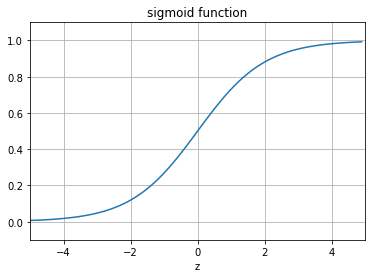

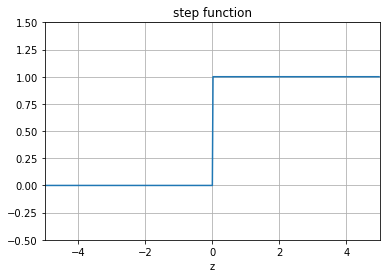

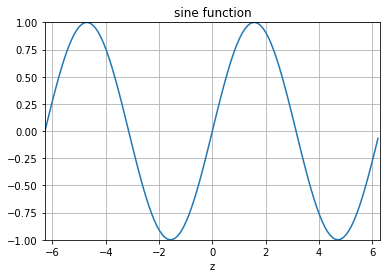

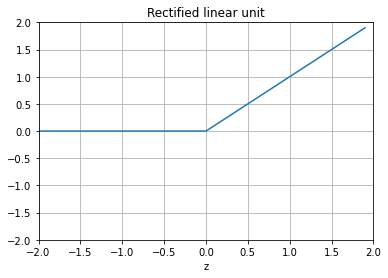

In [1]:
%matplotlib inline

"""The sigmoid function (or the logistic curve) is a 
function that takes any real number, z, and outputs a number (0,1).
It is useful in neural networks for assigning weights on a relative scale.
The value z is the weighted sum of parameters involved in the learning algorithm."""

import numpy
import matplotlib.pyplot as plt
import math as mt

z = numpy.arange(-5, 5, .1)
sigma_fn = numpy.vectorize(lambda z: 1/(1+numpy.exp(-z)))
sigma = sigma_fn(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, sigma)
ax.set_ylim([-0.1, 1.1])
ax.set_xlim([-5,5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('sigmoid function')

plt.show()

"""Step Function"""
z = numpy.arange(-5, 5, .02)
step_fn = numpy.vectorize(lambda z: 1.0 if z >= 0.0 else 0.0)
step = step_fn(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, step)
ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-5,5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('step function')

plt.show()

"""Sine Function"""
z = numpy.arange(-2*mt.pi, 2*mt.pi, 0.1)
t = numpy.sin(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, t)
ax.set_ylim([-1.0, 1.0])
ax.set_xlim([-2*mt.pi,2*mt.pi])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('sine function')

plt.show()

"""Plots a graph of the squashing function used by a rectified linear
unit"""
z = numpy.arange(-2, 2, .1)
zero = numpy.zeros(len(z))
y = numpy.max([zero, z], axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, y)
ax.set_ylim([-2.0, 2.0])
ax.set_xlim([-2.0, 2.0])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('Rectified linear unit')

plt.show()

## The multilayer  perceptron (MLP)

The multilayer perceptron is a very popular, and easy to implement approach, to deep learning. It consists of
1. A neural network with one or more layers of nodes between the input and the output nodes.

2. The multilayer network structure, or architecture, or topology, consists of an input layer, one or more hidden layers, and one output layer.

3. The input nodes pass values to the first hidden layer, its nodes pass the information on to the second and so on till we reach the output layer.

As a convention it is normal to call  a  network with one layer of input units, one layer of hidden
units and one layer of output units as  a two-layer network. A network with two layers of hidden units is called a three-layer network etc etc.

For an MLP network there is no direct connection between the output nodes/neurons/units and  the input nodes/neurons/units.
Hereafter we will call the various entities of a layer for nodes.
There are also no connections within a single layer.

The number of input nodes does not need to equal the number of output
nodes. This applies also to the hidden layers. Each layer may have its
own number of nodes and activation functions.

The hidden layers have their name from the fact that they are not
linked to observables and as we will see below when we define the
so-called activation $\hat{z}$, we can think of this as a basis
expansion of the original inputs $\hat{x}$. The difference however
between neural networks and say linear regression is that now these
basis functions (which will correspond to the weights in the network)
are learned from data. This results in  an important difference between
neural networks and deep learning approaches on one side and methods
like logistic regression or linear regression and their modifications on the other side.



A neural network with only one layer, what we called the simple
perceptron, is best suited if we have a standard binary model with
clear (linear) boundaries between the outcomes. As such it could
equally well be replaced by standard linear regression or logistic
regression. Networks with one or more hidden layers approximate
systems with more complex boundaries.

As stated earlier, 
an important theorem in studies of neural networks, restated without
proof here, is the [universal approximation
theorem](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.441.7873&rep=rep1&type=pdf).

It states that a feed-forward network with a single hidden layer
containing a finite number of neurons can approximate continuous
functions on compact subsets of real functions. The theorem thus
states that simple neural networks can represent a wide variety of
interesting functions when given appropriate parameters. It is the
multilayer feedforward architecture itself which gives neural networks
the potential of being universal approximators.


## Deriving the back propagation code for a multilayer perceptron model

As we have seen now in a feed forward network, we can express the final output of our network in terms of basic matrix-vector multiplications.
The unknowwn quantities are our weights $w_{ij}$ and we need to find an algorithm for changing them so that our errors are as small as possible.
This leads us to the famous [back propagation algorithm](https://www.nature.com/articles/323533a0).

The questions we want to ask are how do changes in the biases and the
weights in our network change the cost function and how can we use the
final output to modify the weights?

To derive these equations let us start with a plain regression problem
and define our cost function as

$$
{\cal C}(\hat{W})  =  \frac{1}{2}\sum_{i=1}^n\left(y_i - t_i\right)^2,
$$

where the $t_i$s are our $n$ targets (the values we want to
reproduce), while the outputs of the network after having propagated
all inputs $\hat{x}$ are given by $y_i$.  Below we will demonstrate
how the basic equations arising from the back propagation algorithm
can be modified in order to study classification problems with $K$
classes.

With our definition of the targets $\hat{t}$, the outputs of the
network $\hat{y}$ and the inputs $\hat{x}$ we
define now the activation $z_j^l$ of node/neuron/unit $j$ of the
$l$-th layer as a function of the bias, the weights which add up from
the previous layer $l-1$ and the forward passes/outputs
$\hat{a}^{l-1}$ from the previous layer as

$$
z_j^l = \sum_{i=1}^{M_{l-1}}w_{ij}^la_i^{l-1}+b_j^l,
$$

where $b_k^l$ are the biases from layer $l$.  Here $M_{l-1}$
represents the total number of nodes/neurons/units of layer $l-1$. The
figure here illustrates this equation.  We can rewrite this in a more
compact form as the matrix-vector products we discussed earlier,

$$
\hat{z}^l = \left(\hat{W}^l\right)^T\hat{a}^{l-1}+\hat{b}^l.
$$

With the activation values $\hat{z}^l$ we can in turn define the
output of layer $l$ as $\hat{a}^l = f(\hat{z}^l)$ where $f$ is our
activation function. In the examples here we will use the sigmoid
function discussed in our logistic regression lectures. We will also use the same activation function $f$ for all layers
and their nodes.  It means we have

$$
a_j^l = f(z_j^l) = \frac{1}{1+\exp{-(z_j^l)}}.
$$

From the definition of the activation $z_j^l$ we have

$$
\frac{\partial z_j^l}{\partial w_{ij}^l} = a_i^{l-1},
$$

and

$$
\frac{\partial z_j^l}{\partial a_i^{l-1}} = w_{ji}^l.
$$

With our definition of the activation function we have that (note that this function depends only on $z_j^l$)

$$
\frac{\partial a_j^l}{\partial z_j^{l}} = a_j^l(1-a_j^l)=f(z_j^l)(1-f(z_j^l)).
$$

### Derivative of the cost function

With these definitions we can now compute the derivative of the cost function in terms of the weights.

Let us specialize to the output layer $l=L$. Our cost function is

$$
{\cal C}(\hat{W^L})  =  \frac{1}{2}\sum_{i=1}^n\left(y_i - t_i\right)^2=\frac{1}{2}\sum_{i=1}^n\left(a_i^L - t_i\right)^2,
$$

The derivative of this function with respect to the weights is

$$
\frac{\partial{\cal C}(\hat{W^L})}{\partial w_{jk}^L}  =  \left(a_j^L - t_j\right)\frac{\partial a_j^L}{\partial w_{jk}^{L}},
$$

The last partial derivative can easily be computed and reads (by applying the chain rule)

$$
\frac{\partial a_j^L}{\partial w_{jk}^{L}} = \frac{\partial a_j^L}{\partial z_{j}^{L}}\frac{\partial z_j^L}{\partial w_{jk}^{L}}=a_j^L(1-a_j^L)a_k^{L-1},
$$

### Bringing it together, first back propagation equation

We have thus

$$
\frac{\partial{\cal C}(\hat{W^L})}{\partial w_{jk}^L}  =  \left(a_j^L - t_j\right)a_j^L(1-a_j^L)a_k^{L-1},
$$

Defining

$$
\delta_j^L = a_j^L(1-a_j^L)\left(a_j^L - t_j\right) = f'(z_j^L)\frac{\partial {\cal C}}{\partial (a_j^L)},
$$

and using the Hadamard product of two vectors we can write this as

$$
\hat{\delta}^L = f'(\hat{z}^L)\circ\frac{\partial {\cal C}}{\partial (\hat{a}^L)}.
$$

This is an important expression. The second term on the right handside
measures how fast the cost function is changing as a function of the $j$th
output activation.  If, for example, the cost function doesn't depend
much on a particular output node $j$, then $\delta_j^L$ will be small,
which is what we would expect. The first term on the right, measures
how fast the activation function $f$ is changing at a given activation
value $z_j^L$.

Notice that everything in the above equations is easily computed.  In
particular, we compute $z_j^L$ while computing the behaviour of the
network, and it is only a small additional overhead to compute
$f'(z^L_j)$.  The exact form of the derivative with respect to the
output depends on the form of the cost function.
However, provided the cost function is known there should be little
trouble in calculating

$$
\frac{\partial {\cal C}}{\partial (a_j^L)}
$$

With the definition of $\delta_j^L$ we have a more compact definition of the derivative of the cost function in terms of the weights, namely

$$
\frac{\partial{\cal C}(\hat{W^L})}{\partial w_{jk}^L}  =  \delta_j^La_k^{L-1}.
$$

### Derivatives in terms of $z_j^L$

It is also easy to see that our previous equation can be written as

$$
\delta_j^L =\frac{\partial {\cal C}}{\partial z_j^L}= \frac{\partial {\cal C}}{\partial a_j^L}\frac{\partial a_j^L}{\partial z_j^L},
$$

which can also be interpreted as the partial derivative of the cost function with respect to the biases $b_j^L$, namely

$$
\delta_j^L = \frac{\partial {\cal C}}{\partial b_j^L}\frac{\partial b_j^L}{\partial z_j^L}=\frac{\partial {\cal C}}{\partial b_j^L},
$$

That is, the error $\delta_j^L$ is exactly equal to the rate of change of the cost function as a function of the bias. 


We have now three equations that are essential for the computations of the derivatives of the cost function at the output layer. These equations are needed to start the algorithm and they are

**The starting equations.**

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation}
\frac{\partial{\cal C}(\hat{W^L})}{\partial w_{jk}^L}  =  \delta_j^La_k^{L-1},
\label{_auto8} \tag{12}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto9"></div>

$$
\begin{equation}
\delta_j^L = f'(z_j^L)\frac{\partial {\cal C}}{\partial (a_j^L)},
\label{_auto9} \tag{13}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto10"></div>

$$
\begin{equation}
\delta_j^L = \frac{\partial {\cal C}}{\partial b_j^L},
\label{_auto10} \tag{14}
\end{equation}
$$

An interesting consequence of the above equations is that when the
activation $a_k^{L-1}$ is small, the gradient term, that is the
derivative of the cost function with respect to the weights, will also
tend to be small. We say then that the weight learns slowly, meaning
that it changes slowly when we minimize the weights via say gradient
descent. In this case we say the system learns slowly.

Another interesting feature is that is when the activation function,
represented by the sigmoid function here, is rather flat when we move towards
its end values $0$ and $1$ (see the above Python codes). In these
cases, the derivatives of the activation function will also be close
to zero, meaning again that the gradients will be small and the
network learns slowly again.



We need a fourth equation and we are set. We are going to propagate
backwards in order to the determine the weights and biases. In order
to do so we need to represent the error in the layer before the final
one $L-1$ in terms of the errors in the final output layer.


### Final back propagating equation

We have that (replacing $L$ with a general layer $l$)

$$
\delta_j^l =\frac{\partial {\cal C}}{\partial z_j^l}.
$$

We want to express this in terms of the equations for layer $l+1$. Using the chain rule and summing over all $k$ entries we have

$$
\delta_j^l =\sum_k \frac{\partial {\cal C}}{\partial z_k^{l+1}}\frac{\partial z_k^{l+1}}{\partial z_j^{l}}=\sum_k \delta_k^{l+1}\frac{\partial z_k^{l+1}}{\partial z_j^{l}},
$$

and recalling that

$$
z_j^{l+1} = \sum_{i=1}^{M_{l}}w_{ij}^{l+1}a_j^{l}+b_j^{l+1},
$$

with $M_l$ being the number of nodes in layer $l$, we obtain

$$
\delta_j^l =\sum_k \delta_k^{l+1}w_{kj}^{l+1}f'(z_j^l),
$$

This is our final equation.

We are now ready to set up the algorithm for back propagation and learning the weights and biases.

## Setting up the Back propagation algorithm



The four equations  provide us with a way of computing the gradient of the cost function. Let us write this out in the form of an algorithm.

First, we set up the input data $\hat{x}$ and the activations
$\hat{z}_1$ of the input layer and compute the activation function and
the pertinent outputs $\hat{a}^1$.



Secondly, we perform then the feed forward till we reach the output
layer and compute all $\hat{z}_l$ of the input layer and compute the
activation function and the pertinent outputs $\hat{a}^l$ for
$l=2,3,\dots,L$.



Thereafter we compute the ouput error $\hat{\delta}^L$ by computing all

$$
\delta_j^L = f'(z_j^L)\frac{\partial {\cal C}}{\partial (a_j^L)}.
$$

Then we compute the back propagate error for each $l=L-1,L-2,\dots,2$ as

$$
\delta_j^l = \sum_k \delta_k^{l+1}w_{kj}^{l+1}f'(z_j^l).
$$

Finally, we update the weights and the biases using gradient descent for each $l=L-1,L-2,\dots,2$ and update the weights and biases according to the rules

$$
w_{jk}^l\leftarrow  = w_{jk}^l- \eta \delta_j^la_k^{l-1},
$$

$$
b_j^l \leftarrow b_j^l-\eta \frac{\partial {\cal C}}{\partial b_j^l}=b_j^l-\eta \delta_j^l,
$$

The parameter $\eta$ is the learning parameter discussed in connection with the gradient descent methods.
Here it is convenient to use stochastic gradient descent (see the examples below) with mini-batches with an outer loop that steps through multiple epochs of training.



## Setting up a Multi-layer perceptron model for classification

We are now gong to develop an example based on the MNIST data
base. This is a classification problem and we need to use our
cross-entropy function we discussed in connection with logistic
regression. The cross-entropy defines our cost function for the
classificaton problems with neural networks.

In binary classification with two classes $(0, 1)$ we define the
logistic/sigmoid function as the probability that a particular input
is in class $0$ or $1$.  This is possible because the logistic
function takes any input from the real numbers and inputs a number
between 0 and 1, and can therefore be interpreted as a probability. It
also has other nice properties, such as a derivative that is simple to
calculate.

For an input $\boldsymbol{a}$ from the hidden layer, the probability that the input $\boldsymbol{x}$
is in class 0 or 1 is just. We let $\theta$ represent the unknown weights and biases to be adjusted by our equations). The variable $x$
represents our activation values $z$. We have

$$
P(y = 0 \mid \hat{x}, \hat{\theta}) = \frac{1}{1 + \exp{(- \hat{x}})} ,
$$

and

$$
P(y = 1 \mid \hat{x}, \hat{\theta}) = 1 - P(y = 0 \mid \hat{x}, \hat{\theta}) ,
$$

where $y \in \{0, 1\}$  and $\hat{\theta}$ represents the weights and biases
of our network.


### Defining the cost function

Our cost function is given as (see the Logistic regression lectures)

$$
\mathcal{C}(\hat{\theta}) = - \ln P(\mathcal{D} \mid \hat{\theta}) = - \sum_{i=1}^n
y_i \ln[P(y_i = 0)] + (1 - y_i) \ln [1 - P(y_i = 0)] = \sum_{i=1}^n \mathcal{L}_i(\hat{\theta}) .
$$

This last equality means that we can interpret our *cost* function as a sum over the *loss* function
for each point in the dataset $\mathcal{L}_i(\hat{\theta})$.  
The negative sign is just so that we can think about our algorithm as minimizing a positive number, rather
than maximizing a negative number.  

In *multiclass* classification it is common to treat each integer label as a so called *one-hot* vector:  

$y = 5 \quad \rightarrow \quad \hat{y} = (0, 0, 0, 0, 0, 1, 0, 0, 0, 0) ,$ and


$y = 1 \quad \rightarrow \quad \hat{y} = (0, 1, 0, 0, 0, 0, 0, 0, 0, 0) ,$ 


i.e. a binary bit string of length $C$, where $C = 10$ is the number of classes in the MNIST dataset (numbers from $0$ to $9$)..  

If $\hat{x}_i$ is the $i$-th input (image), $y_{ic}$ refers to the $c$-th component of the $i$-th
output vector $\hat{y}_i$.  
The probability of $\hat{x}_i$ being in class $c$ will be given by the softmax function:

$$
P(y_{ic} = 1 \mid \hat{x}_i, \hat{\theta}) = \frac{\exp{((\hat{a}_i^{hidden})^T \hat{w}_c)}}
{\sum_{c'=0}^{C-1} \exp{((\hat{a}_i^{hidden})^T \hat{w}_{c'})}} ,
$$

which reduces to the logistic function in the binary case.  
The likelihood of this $C$-class classifier
is now given as:

$$
P(\mathcal{D} \mid \hat{\theta}) = \prod_{i=1}^n \prod_{c=0}^{C-1} [P(y_{ic} = 1)]^{y_{ic}} .
$$

Again we take the negative log-likelihood to define our cost function:

$$
\mathcal{C}(\hat{\theta}) = - \log{P(\mathcal{D} \mid \hat{\theta})}.
$$

See the logistic regression lectures for a full definition of the cost function.

The back propagation equations need now only a small change, namely the definition of a new cost function. We are thus ready to use the same equations as before!

### Example: binary classification problem

As an example of the above let us consider a binary class. As discussed in our logistic regression lectures, we defined a cost function in terms of the parameters $\beta$ as

$$
\mathcal{C}(\hat{\beta}) = - \sum_{i=1}^n \left(y_i\log{p(y_i \vert x_i,\hat{\beta})}+(i-y_i)\log{1-p(y_i \vert x_i,\hat{\beta})}\right),
$$

where we had defined the logistic (sigmoid) function

$$
p(y_i =1\vert x_i,\hat{\beta})=\frac{\exp{(\beta_0+\beta_1 x_i)}}{1+\exp{(\beta_0+\beta_1 x_i)}},
$$

and

$$
p(y_i =0\vert x_i,\hat{\beta})=1-p(y_i =1\vert x_i,\hat{\beta}).
$$

The parameters $\hat{\beta}$ were defined using a minimization method like gradient descent or Newton-Raphson's method. 

Now we replace $x_i$ with the activation $z_i^l$ for a given layer $l$ and the outputs as $y_i=a_i^l=f(z_i^l)$, with $z_i^l$ now being a function of the weights $w_{ij}^l$ and biases $b_i^l$. 
We have then

$$
a_i^l = y_i = \frac{\exp{(z_i^l)}}{1+\exp{(z_i^l)}},
$$

with

$$
z_i^l = \sum_{j}w_{ij}^l a_j^{l-1}+b_i^l,
$$

where the superscript $l-1$ indicates that these are the outputs from layer $l-1$.
Our cost function at the final layer $l=L$ is now

$$
\mathcal{C}(\hat{W}) = - \sum_{i=1}^n \left(t_i\log{a_i^L}+(1-t_i)\log{(1-a_i^L)}\right),
$$

where we have defined the targets $t_i$. The derivatives of the cost function with respect to the output $a_i^L$ are then easily calculated and we get

$$
\frac{\partial \mathcal{C}(\hat{W})}{\partial a_i^L} = \frac{a_i^L-t_i}{a_i^L(1-a_i^L)}.
$$

In case we use another activation function than the logistic one, we need to evaluate other derivatives. 


### The Softmax function

In case we employ the more general case given by the Softmax equation, we need to evaluate the derivative of the activation function with respect to the activation $z_i^l$, that is we need

$$
\frac{\partial f(z_i^l)}{\partial w_{jk}^l} =
\frac{\partial f(z_i^l)}{\partial z_j^l} \frac{\partial z_j^l}{\partial w_{jk}^l}= \frac{\partial f(z_i^l)}{\partial z_j^l}a_k^{l-1}.
$$

For the Softmax function we have

$$
f(z_i^l) = \frac{\exp{(z_i^l)}}{\sum_{m=1}^K\exp{(z_m^l)}}.
$$

Its derivative with respect to $z_j^l$ gives

$$
\frac{\partial f(z_i^l)}{\partial z_j^l}= f(z_i^l)\left(\delta_{ij}-f(z_j^l)\right),
$$

which in case of the simply binary model reduces to  having $i=j$. 

## Developing a code for doing neural networks with back propagation


One can identify a set of key steps when using neural networks to solve supervised learning problems:  

1. Collect and pre-process data  

2. Define model and architecture  

3. Choose cost function and optimizer  

4. Train the model  

5. Evaluate model performance on test data  

6. Adjust hyperparameters (if necessary, network architecture)

Here we will be using the MNIST dataset, which is readily available through the **scikit-learn**
package. You may also find it for example [here](http://yann.lecun.com/exdb/mnist/).  
The *MNIST* (Modified National Institute of Standards and Technology) database is a large database
of handwritten digits that is commonly used for training various image processing systems.  
The MNIST dataset consists of 70 000 images of size $28\times 28$ pixels, each labeled from 0 to 9.  
The scikit-learn dataset we will use consists of a selection of 1797 images of size $8\times 8$ collected and processed from this database.  

To feed data into a feed-forward neural network we need to represent
the inputs as a feature matrix $X = (n_{inputs}, n_{features})$.  Each
row represents an *input*, in this case a handwritten digit, and
each column represents a *feature*, in this case a pixel.  The
correct answers, also known as *labels* or *targets* are
represented as a 1D array of integers 
$Y = (n_{inputs}) = (5, 3, 1, 8,...)$.

As an example, say we want to build a neural network using supervised learning to predict Body-Mass Index (BMI) from
measurements of height (in m)  
and weight (in kg). If we have measurements of 5 people the feature matrix could be for example:  

$$ X = \begin{bmatrix}
1.85 & 81\\
1.71 & 65\\
1.95 & 103\\
1.55 & 42\\
1.63 & 56
\end{bmatrix} ,$$  

and the targets would be:  

$$ Y = (23.7, 22.2, 27.1, 17.5, 21.1) $$  

Since each input image is a 2D matrix, we need to flatten the image
(i.e. "unravel" the 2D matrix into a 1D array) to turn the data into a
feature matrix. This means we lose all spatial information in the
image, such as locality and translational invariance. More complicated
architectures such as Convolutional Neural Networks can take advantage
of such information, and are most commonly applied when analyzing
images.

In [2]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


# ensure the same random numbers appear every time
np.random.seed(0)

# display images in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)


# download MNIST dataset
digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print("inputs = (n_inputs, pixel_width, pixel_height) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print("X = (n_inputs, n_features) = " + str(inputs.shape))


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()

ModuleNotFoundError: No module named 'sklearn'

### Train and test datasets

Performing analysis before partitioning the dataset is a major error, that can lead to incorrect conclusions.  

We will reserve $80 \%$ of our dataset for training and $20 \%$ for testing.  

It is important that the train and test datasets are drawn randomly from our dataset, to ensure
no bias in the sampling.  
Say you are taking measurements of weather data to predict the weather in the coming 5 days.
You don't want to train your model on measurements taken from the hours 00.00 to 12.00, and then test it on data
collected from 12.00 to 24.00.

In [ ]:
from sklearn.model_selection import train_test_split

# one-liner from scikit-learn library
train_size = 0.8
test_size = 1 - train_size
X_train, X_test, Y_train, Y_test = train_test_split(inputs, labels, train_size=train_size,
                                                    test_size=test_size)

# equivalently in numpy
def train_test_split_numpy(inputs, labels, train_size, test_size):
    n_inputs = len(inputs)
    inputs_shuffled = inputs.copy()
    labels_shuffled = labels.copy()
    
    np.random.shuffle(inputs_shuffled)
    np.random.shuffle(labels_shuffled)
    
    train_end = int(n_inputs*train_size)
    X_train, X_test = inputs_shuffled[:train_end], inputs_shuffled[train_end:]
    Y_train, Y_test = labels_shuffled[:train_end], labels_shuffled[train_end:]
    
    return X_train, X_test, Y_train, Y_test

#X_train, X_test, Y_train, Y_test = train_test_split_numpy(inputs, labels, train_size, test_size)

print("Number of training images: " + str(len(X_train)))
print("Number of test images: " + str(len(X_test)))

### Define model and architecture

Our simple feed-forward neural network will consist of an *input* layer, a single *hidden* layer and an *output* layer. The activation $y$ of each neuron is a weighted sum of inputs, passed through an activation function. In case of the simple perceptron model we have 

$$ z = \sum_{i=1}^n w_i a_i ,$$

$$ y = f(z) ,$$

where $f$ is the activation function, $a_i$ represents input from neuron $i$ in the preceding layer
and $w_i$ is the weight to input $i$.  
The activation of the neurons in the input layer is just the features (e.g. a pixel value).  

The simplest activation function for a neuron is the *Heaviside* function:

$$ f(z) = 
\begin{cases}
1,  &  z > 0\\
0,  & \text{otherwise}
\end{cases}
$$

A feed-forward neural network with this activation is known as a *perceptron*.  
For a binary classifier (i.e. two classes, 0 or 1, dog or not-dog) we can also use this in our output layer.  
This activation can be generalized to $k$ classes (using e.g. the *one-against-all* strategy), 
and we call these architectures *multiclass perceptrons*.  

However, it is now common to use the terms Single Layer Perceptron (SLP) (1 hidden layer) and  
Multilayer Perceptron (MLP) (2 or more hidden layers) to refer to feed-forward neural networks with any activation function.  

Typical choices for activation functions include the sigmoid function, hyperbolic tangent, and Rectified Linear Unit (ReLU).  
We will be using the sigmoid function $\sigma(x)$:  

$$ f(x) = \sigma(x) = \frac{1}{1 + e^{-x}} ,$$

which is inspired by probability theory (see logistic regression) and was most commonly used until about 2011. See the discussion below concerning other activation functions.

### Layers

* Input 

Since each input image has 8x8 = 64 pixels or features, we have an input layer of 64 neurons.  

* Hidden layer

We will use 50 neurons in the hidden layer receiving input from the neurons in the input layer.  
Since each neuron in the hidden layer is connected to the 64 inputs we have 64x50 = 3200 weights to the hidden layer.  

* Output

If we were building a binary classifier, it would be sufficient with a single neuron in the output layer,
which could output 0 or 1 according to the Heaviside function. This would be an example of a *hard* classifier, meaning it outputs the class of the input directly. However, if we are dealing with noisy data it is often beneficial to use a *soft* classifier, which outputs the probability of being in class 0 or 1.  

For a soft binary classifier, we could use a single neuron and interpret the output as either being the probability of being in class 0 or the probability of being in class 1. Alternatively we could use 2 neurons, and interpret each neuron as the probability of being in each class.  

Since we are doing multiclass classification, with 10 categories, it is natural to use 10 neurons in the output layer. We number the neurons $j = 0,1,...,9$. The activation of each output neuron $j$ will be according to the *softmax* function:  

$$ P(\text{class $j$} \mid \text{input $\hat{a}$}) = \frac{\exp{(\hat{a}^T \hat{w}_j)}}
{\sum_{c=0}^{9} \exp{(\hat{a}^T \hat{w}_c)}} ,$$  

i.e. each neuron $j$ outputs the probability of being in class $j$ given an input from the hidden layer $\hat{a}$, with $\hat{w}_j$ the weights of neuron $j$ to the inputs.  
The denominator is a normalization factor to ensure the outputs (probabilities) sum up to 1.  
The exponent is just the weighted sum of inputs as before:  

$$ z_j = \sum_{i=1}^n w_ {ij} a_i+b_j.$$  

Since each neuron in the output layer is connected to the 50 inputs from the hidden layer we have 50x10 = 500
weights to the output layer.

### Weights and biases

Typically weights are initialized with small values distributed around zero, drawn from a uniform
or normal distribution. Setting all weights to zero means all neurons give the same output, making the network useless.  

Adding a bias value to the weighted sum of inputs allows the neural network to represent a greater range
of values. Without it, any input with the value 0 will be mapped to zero (before being passed through the activation). The bias unit has an output of 1, and a weight to each neuron $j$, $b_j$:  

$$ z_j = \sum_{i=1}^n w_ {ij} a_i + b_j.$$  

The bias weights $\hat{b}$ are often initialized to zero, but a small value like $0.01$ ensures all neurons have some output which can be backpropagated in the first training cycle.

In [ ]:
# building our neural network

n_inputs, n_features = X_train.shape
n_hidden_neurons = 50
n_categories = 10

# we make the weights normally distributed using numpy.random.randn

# weights and bias in the hidden layer
hidden_weights = np.random.randn(n_features, n_hidden_neurons)
hidden_bias = np.zeros(n_hidden_neurons) + 0.01

# weights and bias in the output layer
output_weights = np.random.randn(n_hidden_neurons, n_categories)
output_bias = np.zeros(n_categories) + 0.01

### Feed-forward pass

Denote $F$ the number of features, $H$ the number of hidden neurons and $C$ the number of categories.  
For each input image we calculate a weighted sum of input features (pixel values) to each neuron $j$ in the hidden layer $l$:  

$$ z_{j}^{l} = \sum_{i=1}^{F} w_{ij}^{l} x_i + b_{j}^{l},$$

this is then passed through our activation function  

$$ a_{j}^{l} = f(z_{j}^{l}) .$$  

We calculate a weighted sum of inputs (activations in the hidden layer) to each neuron $j$ in the output layer:  

$$ z_{j}^{L} = \sum_{i=1}^{H} w_{ij}^{L} a_{i}^{l} + b_{j}^{L}.$$  

Finally we calculate the output of neuron $j$ in the output layer using the softmax function:  

$$ a_{j}^{L} = \frac{\exp{(z_j^{L})}}
{\sum_{c=0}^{C-1} \exp{(z_c^{L})}} .$$  

### Matrix multiplications

Since our data has the dimensions $X = (n_{inputs}, n_{features})$ and our weights to the hidden
layer have the dimensions  
$W_{hidden} = (n_{features}, n_{hidden})$,
we can easily feed the network all our training data in one go by taking the matrix product  

$$ X W^{h} = (n_{inputs}, n_{hidden}),$$ 

and obtain a matrix that holds the weighted sum of inputs to the hidden layer
for each input image and each hidden neuron.    
We also add the bias to obtain a matrix of weighted sums to the hidden layer $Z^{h}$:  

$$ \hat{z}^{l} = \hat{X} \hat{W}^{l} + \hat{b}^{l} ,$$

meaning the same bias (1D array with size equal number of hidden neurons) is added to each input image.  
This is then passed through the activation:  

$$ \hat{a}^{l} = f(\hat{z}^l) .$$  

This is fed to the output layer:  

$$ \hat{z}^{L} = \hat{a}^{L} \hat{W}^{L} + \hat{b}^{L} .$$

Finally we receive our output values for each image and each category by passing it through the softmax function:  

$$ output = softmax (\hat{z}^{L}) = (n_{inputs}, n_{categories}) .$$

In [ ]:
# setup the feed-forward pass, subscript h = hidden layer

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def feed_forward(X):
    # weighted sum of inputs to the hidden layer
    z_h = np.matmul(X, hidden_weights) + hidden_bias
    # activation in the hidden layer
    a_h = sigmoid(z_h)
    
    # weighted sum of inputs to the output layer
    z_o = np.matmul(a_h, output_weights) + output_bias
    # softmax output
    # axis 0 holds each input and axis 1 the probabilities of each category
    exp_term = np.exp(z_o)
    probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)
    
    return probabilities

probabilities = feed_forward(X_train)
print("probabilities = (n_inputs, n_categories) = " + str(probabilities.shape))
print("probability that image 0 is in category 0,1,2,...,9 = \n" + str(probabilities[0]))
print("probabilities sum up to: " + str(probabilities[0].sum()))
print()

# we obtain a prediction by taking the class with the highest likelihood
def predict(X):
    probabilities = feed_forward(X)
    return np.argmax(probabilities, axis=1)

predictions = predict(X_train)
print("predictions = (n_inputs) = " + str(predictions.shape))
print("prediction for image 0: " + str(predictions[0]))
print("correct label for image 0: " + str(Y_train[0]))

### Choose cost function and optimizer

To measure how well our neural network is doing we need to introduce a cost function.  
We will call the function that gives the error of a single sample output the *loss* function, and the function
that gives the total error of our network across all samples the *cost* function.
A typical choice for multiclass classification is the *cross-entropy* loss, also known as the negative log likelihood.  

In *multiclass* classification it is common to treat each integer label as a so called *one-hot* vector:  

$$ y = 5 \quad \rightarrow \quad \hat{y} = (0, 0, 0, 0, 0, 1, 0, 0, 0, 0) ,$$  


$$ y = 1 \quad \rightarrow \quad \hat{y} = (0, 1, 0, 0, 0, 0, 0, 0, 0, 0) ,$$  


i.e. a binary bit string of length $C$, where $C = 10$ is the number of classes in the MNIST dataset.  

Let $y_{ic}$ denote the $c$-th component of the $i$-th one-hot vector.  
We define the cost function $\mathcal{C}$ as a sum over the cross-entropy loss for each point $\hat{x}_i$ in the dataset.

In the one-hot representation only one of the terms in the loss function is non-zero, namely the
probability of the correct category $c'$  
(i.e. the category $c'$ such that $y_{ic'} = 1$). This means that the cross entropy loss only punishes you for how wrong
you got the correct label. The probability of category $c$ is given by the softmax function. The vector $\hat{\theta}$ represents the parameters of our network, i.e. all the weights and biases.  


### Optimizing the cost function

The network is trained by finding the weights and biases that minimize the cost function. One of the most widely used classes of methods is *gradient descent* and its generalizations. The idea behind gradient descent
is simply to adjust the weights in the direction where the gradient of the cost function is large and negative. This ensures we flow toward a *local* minimum of the cost function.  
Each parameter $\theta$ is iteratively adjusted according to the rule  

$$ \theta_{i+1} = \theta_i - \eta \nabla \mathcal{C}(\theta_i) ,$$

where $\eta$ is known as the *learning rate*, which controls how big a step we take towards the minimum.  
This update can be repeated for any number of iterations, or until we are satisfied with the result.  

A simple and effective improvement is a variant called *Batch Gradient Descent*.  
Instead of calculating the gradient on the whole dataset, we calculate an approximation of the gradient
on a subset of the data called a *minibatch*.  
If there are $N$ data points and we have a minibatch size of $M$, the total number of batches
is $N/M$.  
We denote each minibatch $B_k$, with $k = 1, 2,...,N/M$. The gradient then becomes:  

$$ \nabla \mathcal{C}(\theta) = \frac{1}{N} \sum_{i=1}^N \nabla \mathcal{L}_i(\theta) \quad \rightarrow \quad
\frac{1}{M} \sum_{i \in B_k} \nabla \mathcal{L}_i(\theta) ,$$

i.e. instead of averaging the loss over the entire dataset, we average over a minibatch.  

This has two important benefits:  
1. Introducing stochasticity decreases the chance that the algorithm becomes stuck in a local minima.  

2. It significantly speeds up the calculation, since we do not have to use the entire dataset to calculate the gradient.  

The various optmization  methods, with codes and algorithms,  are discussed in our lectures on [Gradient descent approaches](https://compphysics.github.io/MachineLearning/doc/pub/Splines/html/Splines-bs.html).

### Regularization

It is common to add an extra term to the cost function, proportional
to the size of the weights.  This is equivalent to constraining the
size of the weights, so that they do not grow out of control.
Constraining the size of the weights means that the weights cannot
grow arbitrarily large to fit the training data, and in this way
reduces *overfitting*.

We will measure the size of the weights using the so called *L2-norm*, meaning our cost function becomes:  

$$ \nabla \mathcal{C}(\theta) = \frac{1}{N} \sum_{i=1}^N \nabla \mathcal{L}_i(\theta) \quad \rightarrow \quad
\frac{1}{N} \sum_{i=1}^N \nabla \mathcal{L}_i(\theta) + \lambda \lvert \lvert \hat{w} \rvert \rvert_2^2 
= \frac{1}{N} \sum_{i=1}^N \nabla \mathcal{L}(\theta) + \lambda \sum_{ij} w_{ij}^2,$$  

i.e. we sum up all the weights squared. The factor $\lambda$ is known as a regularization parameter.


In order to train the model, we need to calculate the derivative of
the cost function with respect to every bias and weight in the
network.  In total our network has $(64 + 1)\times 50=3250$ weights in
the hidden layer and $(50 + 1)\times 10=510$ weights to the output
layer ($+1$ for the bias), and the gradient must be calculated for
every parameter.  We use the *backpropagation* algorithm discussed
above. This is a clever use of the chain rule that allows us to
calculate the gradient efficently. 




To more efficently train our network these equations are implemented using matrix operations.  
The error in the output layer is calculated simply as, with $\hat{t}$ being our targets,  

$$ \delta_L = \hat{t} - \hat{y} = (n_{inputs}, n_{categories}) .$$  

The gradient for the output weights is calculated as  

$$ \nabla W_{L} = \hat{a}^T \delta_L   = (n_{hidden}, n_{categories}) ,$$

where $\hat{a} = (n_{inputs}, n_{hidden})$. This simply means that we are summing up the gradients for each input.  
Since we are going backwards we have to transpose the activation matrix.  

The gradient with respect to the output bias is then  

$$ \nabla \hat{b}_{L} = \sum_{i=1}^{n_{inputs}} \delta_L = (n_{categories}) .$$  

The error in the hidden layer is  

$$ \Delta_h = \delta_L W_{L}^T \circ f'(z_{h}) = \delta_L W_{L}^T \circ a_{h} \circ (1 - a_{h}) = (n_{inputs}, n_{hidden}) ,$$  

where $f'(a_{h})$ is the derivative of the activation in the hidden layer. The matrix products mean
that we are summing up the products for each neuron in the output layer. The symbol $\circ$ denotes
the *Hadamard product*, meaning element-wise multiplication.  

This again gives us the gradients in the hidden layer:  

$$ \nabla W_{h} = X^T \delta_h = (n_{features}, n_{hidden}) ,$$  

$$ \nabla b_{h} = \sum_{i=1}^{n_{inputs}} \delta_h = (n_{hidden}) .$$

In [ ]:
# to categorical turns our integer vector into a onehot representation
from sklearn.metrics import accuracy_score

# one-hot in numpy
def to_categorical_numpy(integer_vector):
    n_inputs = len(integer_vector)
    n_categories = np.max(integer_vector) + 1
    onehot_vector = np.zeros((n_inputs, n_categories))
    onehot_vector[range(n_inputs), integer_vector] = 1
    
    return onehot_vector

#Y_train_onehot, Y_test_onehot = to_categorical(Y_train), to_categorical(Y_test)
Y_train_onehot, Y_test_onehot = to_categorical_numpy(Y_train), to_categorical_numpy(Y_test)

def feed_forward_train(X):
    # weighted sum of inputs to the hidden layer
    z_h = np.matmul(X, hidden_weights) + hidden_bias
    # activation in the hidden layer
    a_h = sigmoid(z_h)
    
    # weighted sum of inputs to the output layer
    z_o = np.matmul(a_h, output_weights) + output_bias
    # softmax output
    # axis 0 holds each input and axis 1 the probabilities of each category
    exp_term = np.exp(z_o)
    probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)
    
    # for backpropagation need activations in hidden and output layers
    return a_h, probabilities

def backpropagation(X, Y):
    a_h, probabilities = feed_forward_train(X)
    
    # error in the output layer
    error_output = probabilities - Y
    # error in the hidden layer
    error_hidden = np.matmul(error_output, output_weights.T) * a_h * (1 - a_h)
    
    # gradients for the output layer
    output_weights_gradient = np.matmul(a_h.T, error_output)
    output_bias_gradient = np.sum(error_output, axis=0)
    
    # gradient for the hidden layer
    hidden_weights_gradient = np.matmul(X.T, error_hidden)
    hidden_bias_gradient = np.sum(error_hidden, axis=0)

    return output_weights_gradient, output_bias_gradient, hidden_weights_gradient, hidden_bias_gradient

print("Old accuracy on training data: " + str(accuracy_score(predict(X_train), Y_train)))

eta = 0.01
lmbd = 0.01
for i in range(1000):
    # calculate gradients
    dWo, dBo, dWh, dBh = backpropagation(X_train, Y_train_onehot)
    
    # regularization term gradients
    dWo += lmbd * output_weights
    dWh += lmbd * hidden_weights
    
    # update weights and biases
    output_weights -= eta * dWo
    output_bias -= eta * dBo
    hidden_weights -= eta * dWh
    hidden_bias -= eta * dBh

print("New accuracy on training data: " + str(accuracy_score(predict(X_train), Y_train)))

As we can see the network does not seem to be learning at all. It seems to be just guessing the label for each image.  
In order to obtain a network that does something useful, we will have to do a bit more work.  

The choice of *hyperparameters* such as learning rate and regularization parameter is hugely influential for the performance of the network. Typically a *grid-search* is performed, wherein we test different hyperparameters separated by orders of magnitude. For example we could test the learning rates $\eta = 10^{-6}, 10^{-5},...,10^{-1}$ with different regularization parameters $\lambda = 10^{-6},...,10^{-0}$.  

Next, we haven't implemented minibatching yet, which introduces stochasticity and is though to act as an important regularizer on the weights. We call a feed-forward + backward pass with a minibatch an *iteration*, and a full training period
going through the entire dataset ($n/M$ batches) an *epoch*.

If this does not improve network performance, you may want to consider altering the network architecture, adding more neurons or hidden layers.  
Andrew Ng goes through some of these considerations in this [video](https://youtu.be/F1ka6a13S9I). You can find a summary of the video [here](https://kevinzakka.github.io/2016/09/26/applying-deep-learning/).  

### Full object-oriented implementation

It is very natural to think of the network as an object, with specific instances of the network
being realizations of this object with different hyperparameters. An implementation using Python classes provides a clean structure and interface, and the full implementation of our neural network is given below.

In [ ]:
class NeuralNetwork:
    def __init__(
            self,
            X_data,
            Y_data,
            n_hidden_neurons=50,
            n_categories=10,
            epochs=10,
            batch_size=100,
            eta=0.1,
            lmbd=0.0):

        self.X_data_full = X_data
        self.Y_data_full = Y_data

        self.n_inputs = X_data.shape[0]
        self.n_features = X_data.shape[1]
        self.n_hidden_neurons = n_hidden_neurons
        self.n_categories = n_categories

        self.epochs = epochs
        self.batch_size = batch_size
        self.iterations = self.n_inputs // self.batch_size
        self.eta = eta
        self.lmbd = lmbd

        self.create_biases_and_weights()

    def create_biases_and_weights(self):
        self.hidden_weights = np.random.randn(self.n_features, self.n_hidden_neurons)
        self.hidden_bias = np.zeros(self.n_hidden_neurons) + 0.01

        self.output_weights = np.random.randn(self.n_hidden_neurons, self.n_categories)
        self.output_bias = np.zeros(self.n_categories) + 0.01

    def feed_forward(self):
        # feed-forward for training
        self.z_h = np.matmul(self.X_data, self.hidden_weights) + self.hidden_bias
        self.a_h = sigmoid(self.z_h)

        self.z_o = np.matmul(self.a_h, self.output_weights) + self.output_bias

        exp_term = np.exp(self.z_o)
        self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)

    def feed_forward_out(self, X):
        # feed-forward for output
        z_h = np.matmul(X, self.hidden_weights) + self.hidden_bias
        a_h = sigmoid(z_h)

        z_o = np.matmul(a_h, self.output_weights) + self.output_bias
        
        exp_term = np.exp(z_o)
        probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)
        return probabilities

    def backpropagation(self):
        error_output = self.probabilities - self.Y_data
        error_hidden = np.matmul(error_output, self.output_weights.T) * self.a_h * (1 - self.a_h)

        self.output_weights_gradient = np.matmul(self.a_h.T, error_output)
        self.output_bias_gradient = np.sum(error_output, axis=0)

        self.hidden_weights_gradient = np.matmul(self.X_data.T, error_hidden)
        self.hidden_bias_gradient = np.sum(error_hidden, axis=0)

        if self.lmbd > 0.0:
            self.output_weights_gradient += self.lmbd * self.output_weights
            self.hidden_weights_gradient += self.lmbd * self.hidden_weights

        self.output_weights -= self.eta * self.output_weights_gradient
        self.output_bias -= self.eta * self.output_bias_gradient
        self.hidden_weights -= self.eta * self.hidden_weights_gradient
        self.hidden_bias -= self.eta * self.hidden_bias_gradient

    def predict(self, X):
        probabilities = self.feed_forward_out(X)
        return np.argmax(probabilities, axis=1)

    def predict_probabilities(self, X):
        probabilities = self.feed_forward_out(X)
        return probabilities

    def train(self):
        data_indices = np.arange(self.n_inputs)

        for i in range(self.epochs):
            for j in range(self.iterations):
                # pick datapoints with replacement
                chosen_datapoints = np.random.choice(
                    data_indices, size=self.batch_size, replace=False
                )

                # minibatch training data
                self.X_data = self.X_data_full[chosen_datapoints]
                self.Y_data = self.Y_data_full[chosen_datapoints]

                self.feed_forward()
                self.backpropagation()

## Evaluate model performance on test data

To measure the performance of our network we evaluate how well it does it data it has never seen before, i.e. the test data.  
We measure the performance of the network using the *accuracy* score.  
The accuracy is as you would expect just the number of images correctly labeled divided by the total number of images. A perfect classifier will have an accuracy score of $1$.  

$$ \text{Accuracy} = \frac{\sum_{i=1}^n I(\hat{y}_i = y_i)}{n} ,$$  

where $I$ is the indicator function, $1$ if $\hat{y}_i = y_i$ and $0$ otherwise.

In [ ]:
epochs = 100
batch_size = 100

dnn = NeuralNetwork(X_train, Y_train_onehot, eta=eta, lmbd=lmbd, epochs=epochs, batch_size=batch_size,
                    n_hidden_neurons=n_hidden_neurons, n_categories=n_categories)
dnn.train()
test_predict = dnn.predict(X_test)

# accuracy score from scikit library
print("Accuracy score on test set: ", accuracy_score(Y_test, test_predict))

# equivalent in numpy
def accuracy_score_numpy(Y_test, Y_pred):
    return np.sum(Y_test == Y_pred) / len(Y_test)

#print("Accuracy score on test set: ", accuracy_score_numpy(Y_test, test_predict))

### Adjust hyperparameters

We now perform a grid search to find the optimal hyperparameters for the network.  
Note that we are only using 1 layer with 50 neurons, and human performance is estimated to be around $98\%$ ($2\%$ error rate).

In [ ]:
eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)
# store the models for later use
DNN_numpy = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)

# grid search
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        dnn = NeuralNetwork(X_train, Y_train_onehot, eta=eta, lmbd=lmbd, epochs=epochs, batch_size=batch_size,
                            n_hidden_neurons=n_hidden_neurons, n_categories=n_categories)
        dnn.train()
        
        DNN_numpy[i][j] = dnn
        
        test_predict = dnn.predict(X_test)
        
        print("Learning rate  = ", eta)
        print("Lambda = ", lmbd)
        print("Accuracy score on test set: ", accuracy_score(Y_test, test_predict))
        print()

### Visualization

In [ ]:
# visual representation of grid search
# uses seaborn heatmap, you can also do this with matplotlib imshow
import seaborn as sns

sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        dnn = DNN_numpy[i][j]
        
        train_pred = dnn.predict(X_train) 
        test_pred = dnn.predict(X_test)

        train_accuracy[i][j] = accuracy_score(Y_train, train_pred)
        test_accuracy[i][j] = accuracy_score(Y_test, test_pred)

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

### scikit-learn implementation

**scikit-learn** focuses more
on traditional machine learning methods, such as regression,
clustering, decision trees, etc. As such, it has only two types of
neural networks: Multi Layer Perceptron outputting continuous values,
*MPLRegressor*, and Multi Layer Perceptron outputting labels,
*MLPClassifier*. We will see how simple it is to use these classes.

**scikit-learn** implements a few improvements from our neural network,
such as early stopping, a varying learning rate, different
optimization methods, etc. We would therefore expect a better
performance overall.

In [ ]:
from sklearn.neural_network import MLPClassifier
# store models for later use
DNN_scikit = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)

for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        dnn = MLPClassifier(hidden_layer_sizes=(n_hidden_neurons), activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs)
        dnn.fit(X_train, Y_train)
        
        DNN_scikit[i][j] = dnn
        
        print("Learning rate  = ", eta)
        print("Lambda = ", lmbd)
        print("Accuracy score on test set: ", dnn.score(X_test, Y_test))
        print()

In [ ]:
# optional
# visual representation of grid search
# uses seaborn heatmap, could probably do this in matplotlib
import seaborn as sns

sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        dnn = DNN_scikit[i][j]
        
        train_pred = dnn.predict(X_train) 
        test_pred = dnn.predict(X_test)

        train_accuracy[i][j] = accuracy_score(Y_train, train_pred)
        test_accuracy[i][j] = accuracy_score(Y_test, test_pred)

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

## Building neural networks in Tensorflow and Keras

Now we want  to build on the experience gained from our neural network implementation in NumPy and scikit-learn
and use it to construct a neural network in Tensorflow. Once we have constructed a neural network in NumPy
and Tensorflow, building one in Keras is really quite trivial, though the performance may suffer.  

In our previous example we used only one hidden layer, and in this we will use two. From this it should be quite
clear how to build one using an arbitrary number of hidden layers, using data structures such as Python lists or
NumPy arrays.


Tensorflow is an open source library machine learning library
developed by the Google Brain team for internal use. It was released
under the Apache 2.0 open source license in November 9, 2015.

Tensorflow is a computational framework that allows you to construct
machine learning models at different levels of abstraction, from
high-level, object-oriented APIs like Keras, down to the C++ kernels
that Tensorflow is built upon. The higher levels of abstraction are
simpler to use, but less flexible, and our choice of implementation
should reflect the problems we are trying to solve.

[Tensorflow uses](https://www.tensorflow.org/guide/graphs) so-called graphs to represent your computation
in terms of the dependencies between individual operations, such that you first build a Tensorflow *graph*
to represent your model, and then create a Tensorflow *session* to run the graph.

In this guide we will analyze the same data as we did in our NumPy and
scikit-learn tutorial, gathered from the MNIST database of images. We
will give an introduction to the lower level Python Application
Program Interfaces (APIs), and see how we use them to build our graph.
Then we will build (effectively) the same graph in Keras, to see just
how simple solving a machine learning problem can be.

To install tensorflow on Unix/Linux systems, use pip as

In [ ]:
pip3 install tensorflow

and/or if you use **anaconda**, just write (or install from the graphical user interface)

In [ ]:
conda install tensorflow

In [ ]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


# ensure the same random numbers appear every time
np.random.seed(0)

# display images in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)


# download MNIST dataset
digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print("inputs = (n_inputs, pixel_width, pixel_height) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print("X = (n_inputs, n_features) = " + str(inputs.shape))


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()

In [ ]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# one-hot representation of labels
labels = to_categorical(labels)

# split into train and test data
train_size = 0.8
test_size = 1 - train_size
X_train, X_test, Y_train, Y_test = train_test_split(inputs, labels, train_size=train_size,
                                                    test_size=test_size)

### Using TensorFlow backend

1. Define model and architecture

2. Choose cost function and optimizer

In [ ]:
import tensorflow as tf

class NeuralNetworkTensorflow:
    def __init__(
            self,
            X_train,
            Y_train,
            X_test,
            Y_test,
            n_neurons_layer1=100,
            n_neurons_layer2=50,
            n_categories=2,
            epochs=10,
            batch_size=100,
            eta=0.1,
            lmbd=0.0):
        
        # keep track of number of steps
        self.global_step = tf.Variable(0, dtype=tf.int32, trainable=False, name='global_step')
        
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
        
        self.n_inputs = X_train.shape[0]
        self.n_features = X_train.shape[1]
        self.n_neurons_layer1 = n_neurons_layer1
        self.n_neurons_layer2 = n_neurons_layer2
        self.n_categories = n_categories
        
        self.epochs = epochs
        self.batch_size = batch_size
        self.iterations = self.n_inputs // self.batch_size
        self.eta = eta
        self.lmbd = lmbd
        
        # build network piece by piece
        # name scopes (with) are used to enforce creation of new variables
        # https://www.tensorflow.org/guide/variables
        self.create_placeholders()
        self.create_DNN()
        self.create_loss()
        self.create_optimiser()
        self.create_accuracy()
    
    def create_placeholders(self):
        # placeholders are fine here, but "Datasets" are the preferred method
        # of streaming data into a model
        with tf.name_scope('data'):
            self.X = tf.placeholder(tf.float32, shape=(None, self.n_features), name='X_data')
            self.Y = tf.placeholder(tf.float32, shape=(None, self.n_categories), name='Y_data')
    
    def create_DNN(self):
        with tf.name_scope('DNN'):
            # the weights are stored to calculate regularization loss later
            
            # Fully connected layer 1
            self.W_fc1 = self.weight_variable([self.n_features, self.n_neurons_layer1], name='fc1', dtype=tf.float32)
            b_fc1 = self.bias_variable([self.n_neurons_layer1], name='fc1', dtype=tf.float32)
            a_fc1 = tf.nn.sigmoid(tf.matmul(self.X, self.W_fc1) + b_fc1)
            
            # Fully connected layer 2
            self.W_fc2 = self.weight_variable([self.n_neurons_layer1, self.n_neurons_layer2], name='fc2', dtype=tf.float32)
            b_fc2 = self.bias_variable([self.n_neurons_layer2], name='fc2', dtype=tf.float32)
            a_fc2 = tf.nn.sigmoid(tf.matmul(a_fc1, self.W_fc2) + b_fc2)
            
            # Output layer
            self.W_out = self.weight_variable([self.n_neurons_layer2, self.n_categories], name='out', dtype=tf.float32)
            b_out = self.bias_variable([self.n_categories], name='out', dtype=tf.float32)
            self.z_out = tf.matmul(a_fc2, self.W_out) + b_out
    
    def create_loss(self):
        with tf.name_scope('loss'):
            softmax_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=self.Y, logits=self.z_out))
            
            regularizer_loss_fc1 = tf.nn.l2_loss(self.W_fc1)
            regularizer_loss_fc2 = tf.nn.l2_loss(self.W_fc2)
            regularizer_loss_out = tf.nn.l2_loss(self.W_out)
            regularizer_loss = self.lmbd*(regularizer_loss_fc1 + regularizer_loss_fc2 + regularizer_loss_out)
            
            self.loss = softmax_loss + regularizer_loss

    def create_accuracy(self):
        with tf.name_scope('accuracy'):
            probabilities = tf.nn.softmax(self.z_out)
            predictions = tf.argmax(probabilities, axis=1)
            labels = tf.argmax(self.Y, axis=1)
            
            correct_predictions = tf.equal(predictions, labels)
            correct_predictions = tf.cast(correct_predictions, tf.float32)
            self.accuracy = tf.reduce_mean(correct_predictions)
    
    def create_optimiser(self):
        with tf.name_scope('optimizer'):
            self.optimizer = tf.train.GradientDescentOptimizer(learning_rate=self.eta).minimize(self.loss, global_step=self.global_step)
            
    def weight_variable(self, shape, name='', dtype=tf.float32):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial, name=name, dtype=dtype)
    
    def bias_variable(self, shape, name='', dtype=tf.float32):
        initial = tf.constant(0.1, shape=shape)
        return tf.Variable(initial, name=name, dtype=dtype)
    
    def fit(self):
        data_indices = np.arange(self.n_inputs)

        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for i in range(self.epochs):
                for j in range(self.iterations):
                    chosen_datapoints = np.random.choice(data_indices, size=self.batch_size, replace=False)
                    batch_X, batch_Y = self.X_train[chosen_datapoints], self.Y_train[chosen_datapoints]
            
                    sess.run([DNN.loss, DNN.optimizer],
                        feed_dict={DNN.X: batch_X,
                                   DNN.Y: batch_Y})
                    accuracy = sess.run(DNN.accuracy,
                        feed_dict={DNN.X: batch_X,
                                   DNN.Y: batch_Y})
                    step = sess.run(DNN.global_step)
    
            self.train_loss, self.train_accuracy = sess.run([DNN.loss, DNN.accuracy],
                feed_dict={DNN.X: self.X_train,
                           DNN.Y: self.Y_train})
        
            self.test_loss, self.test_accuracy = sess.run([DNN.loss, DNN.accuracy],
                feed_dict={DNN.X: self.X_test,
                           DNN.Y: self.Y_test})

### Optimizing and using gradient descent

In [ ]:
epochs = 100
batch_size = 100
n_neurons_layer1 = 100
n_neurons_layer2 = 50
n_categories = 10
eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)

In [ ]:
DNN_tf = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
        
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        DNN = NeuralNetworkTensorflow(X_train, Y_train, X_test, Y_test,
                                      n_neurons_layer1, n_neurons_layer2, n_categories,
                                      epochs=epochs, batch_size=batch_size, eta=eta, lmbd=lmbd)
        DNN.fit()
        
        DNN_tf[i][j] = DNN
        
        print("Learning rate = ", eta)
        print("Lambda = ", lmbd)
        print("Test accuracy: %.3f" % DNN.test_accuracy)
        print()

In [ ]:
# optional
# visual representation of grid search
# uses seaborn heatmap, could probably do this in matplotlib
import seaborn as sns

sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        DNN = DNN_tf[i][j]

        train_accuracy[i][j] = DNN.train_accuracy
        test_accuracy[i][j] = DNN.test_accuracy

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

In [ ]:
# optional
# we can use log files to visualize our graph in Tensorboard
writer = tf.summary.FileWriter('logs/')
writer.add_graph(tf.get_default_graph())

### Using Keras

Keras is a high level [neural network](https://en.wikipedia.org/wiki/Application_programming_interface)
that supports Tensorflow, CTNK and Theano as backends.  
If you have Tensorflow installed Keras is available through the *tf.keras* module.  
If you have Anaconda installed you may run the following command

In [ ]:
conda install keras

Alternatively, if you have Tensorflow or one of the other supported backends install you may use the pip package manager:

In [ ]:
pip3 install keras

or look up the [instructions here](https://keras.io/).

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.optimizers import SGD

def create_neural_network_keras(n_neurons_layer1, n_neurons_layer2, n_categories, eta, lmbd):
    model = Sequential()
    model.add(Dense(n_neurons_layer1, activation='sigmoid', kernel_regularizer=l2(lmbd)))
    model.add(Dense(n_neurons_layer2, activation='sigmoid', kernel_regularizer=l2(lmbd)))
    model.add(Dense(n_categories, activation='softmax'))
    
    sgd = SGD(lr=eta)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    return model

In [ ]:
DNN_keras = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
        
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        DNN = create_neural_network_keras(n_neurons_layer1, n_neurons_layer2, n_categories,
                                         eta=eta, lmbd=lmbd)
        DNN.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        scores = DNN.evaluate(X_test, Y_test)
        
        DNN_keras[i][j] = DNN
        
        print("Learning rate = ", eta)
        print("Lambda = ", lmbd)
        print("Test accuracy: %.3f" % scores[1])
        print()

In [ ]:
# optional
# visual representation of grid search
# uses seaborn heatmap, could probably do this in matplotlib
import seaborn as sns

sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        DNN = DNN_keras[i][j]

        train_accuracy[i][j] = DNN.evaluate(X_train, Y_train)[1]
        test_accuracy[i][j] = DNN.evaluate(X_test, Y_test)[1]

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

## Which activation function should I use?

The Back propagation algorithm we derived above works by going from
the output layer to the input layer, propagating the error gradient on
the way. Once the algorithm has computed the gradient of the cost
function with regards to each parameter in the network, it uses these
gradients to update each parameter with a Gradient Descent (GD) step.


Unfortunately for us, the gradients often get smaller and smaller as the
algorithm progresses down to the first hidden layers. As a result, the
GD update leaves the lower layer connection weights
virtually unchanged, and training never converges to a good
solution. This is known in the literature as 
**the vanishing gradients problem**. 

In other cases, the opposite can happen, namely the the gradients can grow bigger and
bigger. The result is that many of the layers get large updates of the 
weights the
algorithm diverges. This is the **exploding gradients problem**, which is
mostly encountered in recurrent neural networks. More generally, deep
neural networks suffer from unstable gradients, different layers may
learn at widely different speeds


## Is the Logistic activation function (Sigmoid)  our choice?

Although this unfortunate behavior has been empirically observed for
quite a while (it was one of the reasons why deep neural networks were
mostly abandoned for a long time), it is only around 2010 that
significant progress was made in understanding it.

A paper titled [Understanding the Difficulty of Training Deep
Feedforward Neural Networks by Xavier Glorot and Yoshua Bengio](http://proceedings.mlr.press/v9/glorot10a.html) found that
the problems with the popular logistic
sigmoid activation function and the weight initialization technique
that was most popular at the time, namely random initialization using
a normal distribution with a mean of 0 and a standard deviation of
1. 

They showed that with this activation function and this
initialization scheme, the variance of the outputs of each layer is
much greater than the variance of its inputs. Going forward in the
network, the variance keeps increasing after each layer until the
activation function saturates at the top layers. This is actually made
worse by the fact that the logistic function has a mean of 0.5, not 0
(the hyperbolic tangent function has a mean of 0 and behaves slightly
better than the logistic function in deep networks).



## The derivative of the Logistic funtion

Looking at the logistic activation function, when inputs become large
(negative or positive), the function saturates at 0 or 1, with a
derivative extremely close to 0. Thus when backpropagation kicks in,
it has virtually no gradient to propagate back through the network,
and what little gradient exists keeps getting diluted as
backpropagation progresses down through the top layers, so there is
really nothing left for the lower layers.

In their paper, Glorot and Bengio propose a way to significantly
alleviate this problem. We need the signal to flow properly in both
directions: in the forward direction when making predictions, and in
the reverse direction when backpropagating gradients. We don’t want
the signal to die out, nor do we want it to explode and saturate. For
the signal to flow properly, the authors argue that we need the
variance of the outputs of each layer to be equal to the variance of
its inputs, and we also need the gradients to have equal variance
before and after flowing through a layer in the reverse direction.



One of the insights in the 2010 paper by Glorot and Bengio was that
the vanishing/exploding gradients problems were in part due to a poor
choice of activation function. Until then most people had assumed that
if Nature had chosen to use roughly sigmoid activation functions in
biological neurons, they must be an excellent choice. But it turns out
that other activation functions behave much better in deep neural
networks, in particular the ReLU activation function, mostly because
it does not saturate for positive values (and also because it is quite
fast to compute).



## The RELU function family

The ReLU activation function suffers from a problem known as the dying
ReLUs: during training, some neurons effectively die, meaning they
stop outputting anything other than 0.

In some cases, you may find that half of your network’s neurons are
dead, especially if you used a large learning rate. During training,
if a neuron’s weights get updated such that the weighted sum of the
neuron’s inputs is negative, it will start outputting 0. When this
happen, the neuron is unlikely to come back to life since the gradient
of the ReLU function is 0 when its input is negative.

To solve this problem, nowadays practitioners use a  variant of the ReLU
function, such as the leaky ReLU discussed above or the so-called
exponential linear unit (ELU) function

$$
ELU(z) = \left\{\begin{array}{cc} \alpha\left( \exp{(z)}-1\right) & z < 0,\\  z & z \ge 0.\end{array}\right.
$$

## Which activation function should we use?

In general it seems that the ELU activation function is better than
the leaky ReLU function (and its variants), which is better than
ReLU. ReLU performs better than $\tanh$ which in turn performs better
than the logistic function. 

If runtime
performance is an issue, then you may opt for the  leaky ReLU function  over the 
ELU function If you don’t
want to tweak yet another hyperparameter, you may just use the default
$\alpha$ of $0.01$ for the leaky ReLU, and $1$ for ELU. If you have
spare time and computing power, you can use cross-validation or
bootstrap to evaluate other activation functions.



## A top-down perspective on Neural networks


The first thing we would like to do is divide the data into two or three
parts. A training set, a validation or dev (development) set, and a
test set. The test set is the data on which we want to make
predictions. The dev set is a subset of the training data we use to
check how well we are doing out-of-sample, after training the model on
the training dataset. We use the validation error as a proxy for the
test error in order to make tweaks to our model. It is crucial that we
do not use any of the test data to train the algorithm. This is a
cardinal sin in ML. Then:


* Estimate optimal error rate

* Minimize underfitting (bias) on training data set.

* Make sure you are not overfitting.

If the validation and test sets are drawn from the same distributions,
then a good performance on the validation set should lead to similarly
good performance on the test set. 

However, sometimes
the training data and test data differ in subtle ways because, for
example, they are collected using slightly different methods, or
because it is cheaper to collect data in one way versus another. In
this case, there can be a mismatch between the training and test
data. This can lead to the neural network overfitting these small
differences between the test and training sets, and a poor performance
on the test set despite having a good performance on the validation
set. To rectify this, Andrew Ng suggests making two validation or dev
sets, one constructed from the training data and one constructed from
the test data. The difference between the performance of the algorithm
on these two validation sets quantifies the train-test mismatch. This
can serve as another important diagnostic when using DNNs for
supervised learning.


## Limitations of supervised learning with deep networks

Like all statistical methods, supervised learning using neural
networks has important limitations. This is especially important when
one seeks to apply these methods, especially to physics problems. Like
all tools, DNNs are not a universal solution. Often, the same or
better performance on a task can be achieved by using a few
hand-engineered features (or even a collection of random
features). 

Here we list some of the important limitations of supervised neural network based models. 



* **Need labeled data**. All supervised learning methods, DNNs for supervised learning require labeled data. Often, labeled data is harder to acquire than unlabeled data (e.g. one must pay for human experts to label images).

* **Supervised neural networks are extremely data intensive.** DNNs are data hungry. They perform best when data is plentiful. This is doubly so for supervised methods where the data must also be labeled. The utility of DNNs is extremely limited if data is hard to acquire or the datasets are small (hundreds to a few thousand samples). In this case, the performance of other methods that utilize hand-engineered features can exceed that of DNNs.

* **Homogeneous data.** Almost all DNNs deal with homogeneous data of one type. It is very hard to design architectures that mix and match data types (i.e. some continuous variables, some discrete variables, some time series). In applications beyond images, video, and language, this is often what is required. In contrast, ensemble models like random forests or gradient-boosted trees have no difficulty handling mixed data types.

* **Many problems are not about prediction.** In natural science we are often interested in learning something about the underlying distribution that generates the data. In this case, it is often difficult to cast these ideas in a supervised learning setting. While the problems are related, it is possible to make good predictions with a *wrong* model. The model might or might not be useful for understanding the underlying science.

Some of these remarks are particular to DNNs, others are shared by all supervised learning methods. This motivates the use of unsupervised methods which in part circumvent these problems.






## Boltzmann Machines

Why use a generative model rather than the more well known discriminative deep neural networks (DNN)? 

* Discriminitave methods have several limitations: They are mainly supervised learning methods, thus requiring labeled data. And there are tasks they cannot accomplish, like drawing new examples from an unknown probability distribution.

* A generative model can learn to represent and sample from a probability distribution. The core idea is to learn a parametric model of the probability distribution from which the training data was drawn. As an example

a. A model for images could learn to draw new examples of cats and dogs, given a training dataset of images of cats and dogs.

b. Generate a sample of an ordered or disordered Ising model phase, having been given samples of such phases.

c. Model the trial function for Monte Carlo calculations


4. Both use gradient-descent based learning procedures for minimizing cost functions

5. Energy based models don't use backpropagation and automatic differentiation for computing gradients, instead turning to Markov Chain Monte Carlo methods.

6. DNNs often have several hidden layers. A restricted Boltzmann machine has only one hidden layer, however several RBMs can be stacked to make up Deep Belief Networks, of which they constitute the building blocks.

History: The RBM was developed by amongst others Geoffrey Hinton, called by some the "Godfather of Deep Learning", working with the University of Toronto and Google.



A BM is what we would call an undirected probabilistic graphical model
with stochastic continuous or discrete units.


It is interpreted as a stochastic recurrent neural network where the
state of each unit(neurons/nodes) depends on the units it is connected
to. The weights in the network represent thus the strength of the
interaction between various units/nodes.


It turns into a Hopfield network if we choose deterministic rather
than stochastic units. In contrast to a Hopfield network, a BM is a
so-called generative model. It allows us to generate new samples from
the learned distribution.



A standard BM network is divided into a set of observable and visible units $\hat{x}$ and a set of unknown hidden units/nodes $\hat{h}$.



Additionally there can be bias nodes for the hidden and visible layers. These biases are normally set to $1$.



BMs are stackable, meaning they cwe can train a BM which serves as input to another BM. We can construct deep networks for learning complex PDFs. The layers can be trained one after another, a feature which makes them popular in deep learning



However, they are often hard to train. This leads to the introduction of so-called restricted BMs, or RBMS.
Here we take away all lateral connections between nodes in the visible layer as well as connections between nodes in the hidden layer. The network is illustrated in the figure below.

<!-- dom:FIGURE: [figures/RBM.png, width=800 frac=1.0] -->
<!-- begin figure -->

<p></p>
<img src="figures/RBM.png" width=800>

<!-- end figure -->




## The network

**The network layers**:
1. A function $\mathbf{x}$ that represents the visible layer, a vector of $M$ elements (nodes). This layer represents both what the RBM might be given as training input, and what we want it to be able to reconstruct. This might for example be the pixels of an image, the spin values of the Ising model, or coefficients representing speech.

2. The function $\mathbf{h}$ represents the hidden, or latent, layer. A vector of $N$ elements (nodes). Also called "feature detectors".

The goal of the hidden layer is to increase the model's expressive power. We encode complex interactions between visible variables by introducing additional, hidden variables that interact with visible degrees of freedom in a simple manner, yet still reproduce the complex correlations between visible degrees in the data once marginalized over (integrated out).

Examples of this trick being employed in physics: 
1. The Hubbard-Stratonovich transformation

2. The introduction of ghost fields in gauge theory

3. Shadow wave functions in Quantum Monte Carlo simulations

**The network parameters, to be optimized/learned**:
1. $\mathbf{a}$ represents the visible bias, a vector of same length as $\mathbf{x}$.

2. $\mathbf{b}$ represents the hidden bias, a vector of same lenght as $\mathbf{h}$.

3. $W$ represents the interaction weights, a matrix of size $M\times N$.

### Joint distribution

The restricted Boltzmann machine is described by a Bolztmann distribution

<!-- Equation labels as ordinary links -->
<div id="_auto11"></div>

$$
\begin{equation}
	P_{rbm}(\mathbf{x},\mathbf{h}) = \frac{1}{Z} e^{-\frac{1}{T_0}E(\mathbf{x},\mathbf{h})},
\label{_auto11} \tag{15}
\end{equation}
$$

where $Z$ is the normalization constant or partition function, defined as

<!-- Equation labels as ordinary links -->
<div id="_auto12"></div>

$$
\begin{equation}
	Z = \int \int e^{-\frac{1}{T_0}E(\mathbf{x},\mathbf{h})} d\mathbf{x} d\mathbf{h}.
\label{_auto12} \tag{16}
\end{equation}
$$

It is common to ignore $T_0$ by setting it to one. 


### Network Elements, the energy function

The function $E(\mathbf{x},\mathbf{h})$ gives the **energy** of a
configuration (pair of vectors) $(\mathbf{x}, \mathbf{h})$. The lower
the energy of a configuration, the higher the probability of it. This
function also depends on the parameters $\mathbf{a}$, $\mathbf{b}$ and
$W$. Thus, when we adjust them during the learning procedure, we are
adjusting the energy function to best fit our problem.

An expression for the energy function is

$$
E(\hat{x},\hat{h}) = -\sum_{ia}^{NA}b_i^a \alpha_i^a(x_i)-\sum_{jd}^{MD}c_j^d \beta_j^d(h_j)-\sum_{ijad}^{NAMD}b_i^a \alpha_i^a(x_i)c_j^d \beta_j^d(h_j)w_{ij}^{ad}.
$$

Here $\beta_j^d(h_j)$ and $\alpha_i^a(x_j)$ are so-called transfer functions that map a given input value to a desired feature value. The labels $a$ and $d$ denote that there can be multiple transfer functions per variable. The first sum depends only on the visible units. The second on the hidden ones. **Note** that there is no connection between nodes in a layer.

The quantities $b$ and $c$ can be interpreted as the visible and hidden biases, respectively.

The connection between the nodes in the two layers is given by the weights $w_{ij}$. 

### Defining different types of RBMs

There are different variants of RBMs, and the differences lie in the types of visible and hidden units we choose as well as in the implementation of the energy function $E(\mathbf{x},\mathbf{h})$. 

**Binary-Binary RBM:**


RBMs were first developed using binary units in both the visible and hidden layer. The corresponding energy function is defined as follows:

<!-- Equation labels as ordinary links -->
<div id="_auto13"></div>

$$
\begin{equation}
	E(\mathbf{x}, \mathbf{h}) = - \sum_i^M x_i a_i- \sum_j^N b_j h_j - \sum_{i,j}^{M,N} x_i w_{ij} h_j,
\label{_auto13} \tag{17}
\end{equation}
$$

where the binary values taken on by the nodes are most commonly 0 and 1.


**Gaussian-Binary RBM:**


Another varient is the RBM where the visible units are Gaussian while the hidden units remain binary:

<!-- Equation labels as ordinary links -->
<div id="_auto14"></div>

$$
\begin{equation}
	E(\mathbf{x}, \mathbf{h}) = \sum_i^M \frac{(x_i - a_i)^2}{2\sigma_i^2} - \sum_j^N b_j h_j - \sum_{i,j}^{M,N} \frac{x_i w_{ij} h_j}{\sigma_i^2}. 
\label{_auto14} \tag{18}
\end{equation}
$$

1. RBMs are Useful when we model continuous data (i.e., we wish $\mathbf{x}$ to be continuous)

2. Requires a smaller learning rate, since there's no upper bound to the value a component might take in the reconstruction

Other types of units include:
1. Softmax and multinomial units

2. Gaussian visible and hidden units

3. Binomial units

4. Rectified linear units

### Cost function

When working with a training dataset, the most common training approach is maximizing the log-likelihood of the training data. The log likelihood characterizes the log-probability of generating the observed data using our generative model. Using this method our cost function is chosen as the negative log-likelihood. The learning then consists of trying to find parameters that maximize the probability of the dataset, and is known as Maximum Likelihood Estimation (MLE).
Denoting the parameters as $\boldsymbol{\theta} = a_1,...,a_M,b_1,...,b_N,w_{11},...,w_{MN}$, the log-likelihood is given by

<!-- Equation labels as ordinary links -->
<div id="_auto15"></div>

$$
\begin{equation}
	\mathcal{L}(\{ \theta_i \}) = \langle \text{log} P_\theta(\boldsymbol{x}) \rangle_{data} 
\label{_auto15} \tag{19}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto16"></div>

$$
\begin{equation} 
	= - \langle E(\boldsymbol{x}; \{ \theta_i\}) \rangle_{data} - \text{log} Z(\{ \theta_i\}),
\label{_auto16} \tag{20}
\end{equation}
$$

where we used that the normalization constant does not depend on the data, $\langle \text{log} Z(\{ \theta_i\}) \rangle = \text{log} Z(\{ \theta_i\})$
Our cost function is the negative log-likelihood, $\mathcal{C}(\{ \theta_i \}) = - \mathcal{L}(\{ \theta_i \})$

### Optimization / Training

The training procedure of choice often is Stochastic Gradient Descent (SGD). It consists of a series of iterations where we update the parameters according to the equation

<!-- Equation labels as ordinary links -->
<div id="_auto17"></div>

$$
\begin{equation}
	\boldsymbol{\theta}_{k+1} = \boldsymbol{\theta}_k - \eta \nabla \mathcal{C} (\boldsymbol{\theta}_k)
\label{_auto17} \tag{21}
\end{equation}
$$

at each $k$-th iteration. There are a range of variants of the algorithm which aim at making the learning rate $\eta$ more adaptive so the method might be more efficient while remaining stable.

We now need the gradient of the cost function in order to minimize it. We find that

<!-- Equation labels as ordinary links -->
<div id="_auto18"></div>

$$
\begin{equation}
	\frac{\partial \mathcal{C}(\{ \theta_i\})}{\partial \theta_i}
	= \langle \frac{\partial E(\boldsymbol{x}; \theta_i)}{\partial \theta_i} \rangle_{data}
	+ \frac{\partial \text{log} Z(\{ \theta_i\})}{\partial \theta_i} 
\label{_auto18} \tag{22}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto19"></div>

$$
\begin{equation} 
	= \langle O_i(\boldsymbol{x}) \rangle_{data} - \langle O_i(\boldsymbol{x}) \rangle_{model},
\label{_auto19} \tag{23}
\end{equation}
$$

where in order to simplify notation we defined the "operator"

<!-- Equation labels as ordinary links -->
<div id="_auto20"></div>

$$
\begin{equation}
	O_i(\boldsymbol{x}) = \frac{\partial E(\boldsymbol{x}; \theta_i)}{\partial \theta_i}, 
\label{_auto20} \tag{24}
\end{equation}
$$

and used the statistical mechanics relationship between expectation values and the log-partition function:

<!-- Equation labels as ordinary links -->
<div id="_auto21"></div>

$$
\begin{equation}
	\langle O_i(\boldsymbol{x}) \rangle_{model} = \text{Tr} P_\theta(\boldsymbol{x})O_i(\boldsymbol{x}) = - \frac{\partial \text{log} Z(\{ \theta_i\})}{\partial \theta_i}.
\label{_auto21} \tag{25}
\end{equation}
$$

The data-dependent term in the gradient is known as the positive phase
of the gradient, while the model-dependent term is known as the
negative phase of the gradient. The aim of the training is to lower
the energy of configurations that are near observed data points
(increasing their probability), and raising the energy of
configurations that are far from observed data points (decreasing
their probability).

The gradient of the negative log-likelihood cost function of a Binary-Binary RBM is then

<!-- Equation labels as ordinary links -->
<div id="_auto22"></div>

$$
\begin{equation}
	\frac{\partial \mathcal{C} (w_{ij}, a_i, b_j)}{\partial w_{ij}} = \langle x_i h_j \rangle_{data} - \langle x_i h_j \rangle_{model} 
\label{_auto22} \tag{26}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto23"></div>

$$
\begin{equation} 
	\frac{\partial \mathcal{C} (w_{ij}, a_i, b_j)}{\partial a_{ij}} = \langle x_i \rangle_{data} - \langle x_i \rangle_{model} 
\label{_auto23} \tag{27}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto24"></div>

$$
\begin{equation} 
	\frac{\partial \mathcal{C} (w_{ij}, a_i, b_j)}{\partial b_{ij}} = \langle h_i \rangle_{data} - \langle h_i \rangle_{model}. 
\label{_auto24} \tag{28}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto25"></div>

$$
\begin{equation} 
\label{_auto25} \tag{29}
\end{equation}
$$

To get the expectation values with respect to the *data*, we set the visible units to each of the observed samples in the training data, then update the hidden units according to the conditional probability found before. We then average over all samples in the training data to calculate expectation values with respect to the data. 




### Kullback-Leibler relative entropy

When the goal of the training is to approximate a probability
distribution, as it is in generative modeling, another relevant
measure is the **Kullback-Leibler divergence**, also known as the
relative entropy or Shannon entropy. It is a non-symmetric measure of the
dissimilarity between two probability density functions $p$ and
$q$. If $p$ is the unkown probability which we approximate with $q$,
we can measure the difference by

<!-- Equation labels as ordinary links -->
<div id="_auto26"></div>

$$
\begin{equation}
	\text{KL}(p||q) = \int_{-\infty}^{\infty} p (\boldsymbol{x}) \log \frac{p(\boldsymbol{x})}{q(\boldsymbol{x})}  d\boldsymbol{x}.
\label{_auto26} \tag{30}
\end{equation}
$$

Thus, the Kullback-Leibler divergence between the distribution of the
training data $f(\boldsymbol{x})$ and the model distribution $p(\boldsymbol{x}|
\boldsymbol{\theta})$ is

<!-- Equation labels as ordinary links -->
<div id="_auto27"></div>

$$
\begin{equation}
	\text{KL} (f(\boldsymbol{x})|| p(\boldsymbol{x}| \boldsymbol{\theta})) = \int_{-\infty}^{\infty}
	f (\boldsymbol{x}) \log \frac{f(\boldsymbol{x})}{p(\boldsymbol{x}| \boldsymbol{\theta})} d\boldsymbol{x} 
\label{_auto27} \tag{31}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto28"></div>

$$
\begin{equation} 
	= \int_{-\infty}^{\infty} f(\boldsymbol{x}) \log f(\boldsymbol{x}) d\boldsymbol{x} - \int_{-\infty}^{\infty} f(\boldsymbol{x}) \log
	p(\boldsymbol{x}| \boldsymbol{\theta}) d\boldsymbol{x} 
\label{_auto28} \tag{32}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto29"></div>

$$
\begin{equation} 
	%= \mathbb{E}_{f(\boldsymbol{x})} (\log f(\boldsymbol{x})) - \mathbb{E}_{f(\boldsymbol{x})} (\log p(\boldsymbol{x}| \boldsymbol{\theta}))
	= \langle \log f(\boldsymbol{x}) \rangle_{f(\boldsymbol{x})} - \langle \log p(\boldsymbol{x}| \boldsymbol{\theta}) \rangle_{f(\boldsymbol{x})} 
\label{_auto29} \tag{33}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto30"></div>

$$
\begin{equation} 
	= \langle \log f(\boldsymbol{x}) \rangle_{data} + \langle E(\boldsymbol{x}) \rangle_{data} + \log Z 
\label{_auto30} \tag{34}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto31"></div>

$$
\begin{equation} 
	= \langle \log f(\boldsymbol{x}) \rangle_{data} + \mathcal{C}_{LL} .
\label{_auto31} \tag{35}
\end{equation}
$$

The first term is constant with respect to $\boldsymbol{\theta}$ since $f(\boldsymbol{x})$ is independent of $\boldsymbol{\theta}$. Thus the Kullback-Leibler Divergence is minimal when the second term is minimal. The second term is the log-likelihood cost function, hence minimizing the Kullback-Leibler divergence is equivalent to maximizing the log-likelihood.


To further understand generative models it is useful to study the
gradient of the cost function which is needed in order to minimize it
using methods like stochastic gradient descent. 

The partition function is the generating function of
expectation values, in particular there are mathematical relationships
between expectation values and the log-partition function. In this
case we have

<!-- Equation labels as ordinary links -->
<div id="_auto32"></div>

$$
\begin{equation}
	\langle \frac{ \partial E(\boldsymbol{x}; \theta_i) } { \partial \theta_i} \rangle_{model}
	= \int p(\boldsymbol{x}| \boldsymbol{\theta}) \frac{ \partial E(\boldsymbol{x}; \theta_i) } { \partial \theta_i} d\boldsymbol{x} 
	= -\frac{\partial \log Z(\theta_i)}{ \partial  \theta_i} .
\label{_auto32} \tag{36}
\end{equation}
$$

Here $\langle \cdot \rangle_{model}$ is the expectation value over the model probability distribution $p(\boldsymbol{x}| \boldsymbol{\theta})$.

## Setting up for gradient descent calculations

Using the previous relationship we can express the gradient of the cost function as

<!-- Equation labels as ordinary links -->
<div id="_auto33"></div>

$$
\begin{equation}
	\frac{\partial \mathcal{C}_{LL}}{\partial \theta_i}
	= \langle \frac{ \partial E(\boldsymbol{x}; \theta_i) } { \partial \theta_i} \rangle_{data} + \frac{\partial \log Z(\theta_i)}{ \partial  \theta_i} 
\label{_auto33} \tag{37}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto34"></div>

$$
\begin{equation} 
	= \langle \frac{ \partial E(\boldsymbol{x}; \theta_i) } { \partial \theta_i} \rangle_{data} - \langle \frac{ \partial E(\boldsymbol{x}; \theta_i) } { \partial \theta_i} \rangle_{model} 
\label{_auto34} \tag{38}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto35"></div>

$$
\begin{equation} 
	%= \langle O_i(\boldsymbol{x}) \rangle_{data} - \langle O_i(\boldsymbol{x}) \rangle_{model}
\label{_auto35} \tag{39}
\end{equation}
$$

This expression shows that the gradient of the log-likelihood cost
function is a **difference of moments**, with one calculated from
the data and one calculated from the model. The data-dependent term is
called the **positive phase** and the model-dependent term is
called the **negative phase** of the gradient. We see now that
minimizing the cost function results in lowering the energy of
configurations $\boldsymbol{x}$ near points in the training data and
increasing the energy of configurations not observed in the training
data. That means we increase the model's probability of configurations
similar to those in the training data.


The gradient of the cost function also demonstrates why gradients of
unsupervised, generative models must be computed differently from for
those of for example FNNs. While the data-dependent expectation value
is easily calculated based on the samples $\boldsymbol{x}_i$ in the training
data, we must sample from the model in order to generate samples from
which to caclulate the model-dependent term. We sample from the model
by using MCMC-based methods. We can not sample from the model directly
because the partition function $Z$ is generally intractable.

As in supervised machine learning problems, the goal is also here to
perform well on **unseen** data, that is to have good
generalization from the training data. The distribution $f(x)$ we
approximate is not the **true** distribution we wish to estimate,
it is limited to the training data. Hence, in unsupervised training as
well it is important to prevent overfitting to the training data. Thus
it is common to add regularizers to the cost function in the same
manner as we discussed for say linear regression.



## RBMs for the quantum many body problem

The idea of applying RBMs to quantum many body problems was presented by G. Carleo and M. Troyer, working with ETH Zurich and Microsoft Research.

Some of their motivation included

* The wave function $\Psi$ is a monolithic mathematical quantity that contains all the information on a quantum state, be it a single particle or a complex molecule. In principle, an exponential amount of information is needed to fully encode a generic many-body quantum state.

* There are still interesting open problems, including fundamental questions ranging from the dynamical properties of high-dimensional systems to the exact ground-state properties of strongly interacting fermions.

* The difficulty lies in finding a general strategy to reduce the exponential complexity of the full many-body wave function down to its most essential features. That is

a. Dimensional reduction

b. Feature extraction


* Among the most successful techniques to attack these challenges, artifical neural networks play a prominent role.

* Want to understand whether an artifical neural network may adapt to describe a quantum system.

Carleo and Troyer applied the RBM to the quantum mechanical spin lattice systems of the Ising model and Heisenberg model, with encouraging results. Our goal is to test the method on systems of moving particles. For the spin lattice systems it was natural to use a binary-binary RBM, with the nodes taking values of 1 and -1. For moving particles, on the other hand, we want the visible nodes to be continuous, representing position coordinates. Thus, we start by choosing a Gaussian-binary RBM, where the visible nodes are continuous and hidden nodes take on values of 0 or 1. If eventually we would like the hidden nodes to be continuous as well the rectified linear units seem like the most relevant choice.




## Representing the wave function

The wavefunction should be a probability amplitude depending on
 $\boldsymbol{x}$. The RBM model is given by the joint distribution of
 $\boldsymbol{x}$ and $\boldsymbol{h}$

<!-- Equation labels as ordinary links -->
<div id="_auto36"></div>

$$
\begin{equation}
        F_{rbm}(\mathbf{x},\mathbf{h}) = \frac{1}{Z} e^{-\frac{1}{T_0}E(\mathbf{x},\mathbf{h})}.
\label{_auto36} \tag{40}
\end{equation}
$$

To find the marginal distribution of $\boldsymbol{x}$ we set:

<!-- Equation labels as ordinary links -->
<div id="_auto37"></div>

$$
\begin{equation}
        F_{rbm}(\mathbf{x}) = \sum_\mathbf{h} F_{rbm}(\mathbf{x}, \mathbf{h}) 
\label{_auto37} \tag{41}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto38"></div>

$$
\begin{equation} 
                                = \frac{1}{Z}\sum_\mathbf{h} e^{-E(\mathbf{x}, \mathbf{h})}.
\label{_auto38} \tag{42}
\end{equation}
$$

Now this is what we use to represent the wave function, calling it a neural-network quantum state (NQS)

<!-- Equation labels as ordinary links -->
<div id="_auto39"></div>

$$
\begin{equation}
        \Psi (\mathbf{X}) = F_{rbm}(\mathbf{x}) 
\label{_auto39} \tag{43}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto40"></div>

$$
\begin{equation} 
        = \frac{1}{Z}\sum_{\boldsymbol{h}} e^{-E(\mathbf{x}, \mathbf{h})} 
\label{_auto40} \tag{44}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto41"></div>

$$
\begin{equation} 
        = \frac{1}{Z} \sum_{\{h_j\}} e^{-\sum_i^M \frac{(x_i - a_i)^2}{2\sigma^2} + \sum_j^N b_j h_j + \sum_\
{i,j}^{M,N} \frac{x_i w_{ij} h_j}{\sigma^2}} 
\label{_auto41} \tag{45}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto42"></div>

$$
\begin{equation} 
        = \frac{1}{Z} e^{-\sum_i^M \frac{(x_i - a_i)^2}{2\sigma^2}} \prod_j^N (1 + e^{b_j + \sum_i^M \frac{x\
_i w_{ij}}{\sigma^2}}). 
\label{_auto42} \tag{46}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto43"></div>

$$
\begin{equation} 
\label{_auto43} \tag{47}
\end{equation}
$$

## Choose the cost function

Now we don't necessarily have training data (unless we generate it by using some other method). However, what we do have is the variational principle which allows us to obtain the ground state wave function by minimizing the expectation value of the energy of a trial wavefunction (corresponding to the untrained NQS). Similarly to the traditional variational Monte Carlo method then, it is the local energy we wish to minimize. The gradient to use for the stochastic gradient descent procedure is

<!-- Equation labels as ordinary links -->
<div id="_auto44"></div>

$$
\begin{equation}
	C_i = \frac{\partial \langle E_L \rangle}{\partial \theta_i}
	= 2(\langle E_L \frac{1}{\Psi}\frac{\partial \Psi}{\partial \theta_i} \rangle - \langle E_L \rangle \langle \frac{1}{\Psi}\frac{\partial \Psi}{\partial \theta_i} \rangle ),
\label{_auto44} \tag{48}
\end{equation}
$$

where the local energy is given by

<!-- Equation labels as ordinary links -->
<div id="_auto45"></div>

$$
\begin{equation}
	E_L = \frac{1}{\Psi} \hat{\mathbf{H}} \Psi.
\label{_auto45} \tag{49}
\end{equation}
$$

### Mathematical details

Because we are restricted to potential functions which are positive it
is convenient to express them as exponentials, so that

<!-- Equation labels as ordinary links -->
<div id="_auto46"></div>

$$
\begin{equation}
	\phi_C (\boldsymbol{x}_C) = e^{-E_C(\boldsymbol{x}_C)}
\label{_auto46} \tag{50}
\end{equation}
$$

where $E(\boldsymbol{x}_C)$ is called an *energy function*, and the
exponential representation is the *Boltzmann distribution*. The
joint distribution is defined as the product of potentials.

The joint distribution of the random variables is then

$$
p(\boldsymbol{x}) = \frac{1}{Z} \prod_C \phi_C (\boldsymbol{x}_C) \nonumber
$$

$$
= \frac{1}{Z} \prod_C e^{-E_C(\boldsymbol{x}_C)} \nonumber
$$

$$
= \frac{1}{Z} e^{-\sum_C E_C(\boldsymbol{x}_C)} \nonumber
$$

1
0
0
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

<!-- Equation labels as ordinary links -->
<div id="_auto48"></div>

$$
\begin{equation}
	p_{BM}(\boldsymbol{x}, \boldsymbol{h}) = \frac{1}{Z_{BM}} e^{-\frac{1}{T}E_{BM}(\boldsymbol{x}, \boldsymbol{h})} ,
\label{_auto48} \tag{52}
\end{equation}
$$

with the partition function

<!-- Equation labels as ordinary links -->
<div id="_auto49"></div>

$$
\begin{equation}
	Z_{BM} = \int \int e^{-\frac{1}{T} E_{BM}(\tilde{\boldsymbol{x}}, \tilde{\boldsymbol{h}})} d\tilde{\boldsymbol{x}} d\tilde{\boldsymbol{h}} .
\label{_auto49} \tag{53}
\end{equation}
$$

$T$ is a physics-inspired parameter named temperature and will be assumed to be 1 unless otherwise stated. The energy function of the Boltzmann machine determines the interactions between the nodes and is defined

$$
E_{BM}(\boldsymbol{x}, \boldsymbol{h}) = - \sum_{i, k}^{M, K} a_i^k \alpha_i^k (x_i)
	- \sum_{j, l}^{N, L} b_j^l \beta_j^l (h_j) 
	- \sum_{i,j,k,l}^{M,N,K,L} \alpha_i^k (x_i) w_{ij}^{kl} \beta_j^l (h_j) \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto50"></div>

$$
\begin{equation} 
	- \sum_{i, m=i+1, k}^{M, M, K} \alpha_i^k (x_i) v_{im}^k \alpha_m^k (x_m)
	- \sum_{j,n=j+1,l}^{N,N,L} \beta_j^l (h_j) u_{jn}^l \beta_n^l (h_n).
\label{_auto50} \tag{54}
\end{equation}
$$

Here $\alpha_i^k (x_i)$ and $\beta_j^l (h_j)$ are one-dimensional
transfer functions or mappings from the given input value to the
desired feature value. They can be arbitrary functions of the input
variables and are independent of the parameterization (parameters
referring to weight and biases), meaning they are not affected by
training of the model. The indices $k$ and $l$ indicate that there can
be multiple transfer functions per variable.  Furthermore, $a_i^k$ and
$b_j^l$ are the visible and hidden bias. $w_{ij}^{kl}$ are weights of
the \textbf{inter-layer} connection terms which connect visible and
hidden units. $ v_{im}^k$ and $u_{jn}^l$ are weights of the
\textbf{intra-layer} connection terms which connect the visible units
to each other and the hidden units to each other, respectively.



We remove the intra-layer connections by setting $v_{im}$ and $u_{jn}$
to zero. The expression for the energy of the RBM is then

<!-- Equation labels as ordinary links -->
<div id="_auto51"></div>

$$
\begin{equation}
	E_{RBM}(\boldsymbol{x}, \boldsymbol{h}) = - \sum_{i, k}^{M, K} a_i^k \alpha_i^k (x_i)
	- \sum_{j, l}^{N, L} b_j^l \beta_j^l (h_j) 
	- \sum_{i,j,k,l}^{M,N,K,L} \alpha_i^k (x_i) w_{ij}^{kl} \beta_j^l (h_j). 
\label{_auto51} \tag{55}
\end{equation}
$$

resulting in

$$
P_{RBM} (\boldsymbol{x}) = \int P_{RBM} (\boldsymbol{x}, \tilde{\boldsymbol{h}})  d \tilde{\boldsymbol{h}} \nonumber
$$

$$
= \frac{1}{Z_{RBM}} \int e^{-E_{RBM} (\boldsymbol{x}, \tilde{\boldsymbol{h}}) } d\tilde{\boldsymbol{h}} \nonumber
$$

$$
= \frac{1}{Z_{RBM}} \int e^{\sum_{i, k} a_i^k \alpha_i^k (x_i)
	+ \sum_{j, l} b_j^l \beta_j^l (\tilde{h}_j) 
	+ \sum_{i,j,k,l} \alpha_i^k (x_i) w_{ij}^{kl} \beta_j^l (\tilde{h}_j)} 
	d\tilde{\boldsymbol{h}} \nonumber
$$

$$
= \frac{1}{Z_{RBM}} e^{\sum_{i, k} a_i^k \alpha_i^k (x_i)}
	\int \prod_j^N e^{\sum_l b_j^l \beta_j^l (\tilde{h}_j) 
	+ \sum_{i,k,l} \alpha_i^k (x_i) w_{ij}^{kl} \beta_j^l (\tilde{h}_j)} d\tilde{\boldsymbol{h}} \nonumber
$$

$$
= \frac{1}{Z_{RBM}} e^{\sum_{i, k} a_i^k \alpha_i^k (x_i)}
	\biggl( \int e^{\sum_l b_1^l \beta_1^l (\tilde{h}_1) + \sum_{i,k,l} \alpha_i^k (x_i) w_{i1}^{kl} \beta_1^l (\tilde{h}_1)} d \tilde{h}_1 \nonumber
$$

$$
\times \int e^{\sum_l b_2^l \beta_2^l (\tilde{h}_2) + \sum_{i,k,l} \alpha_i^k (x_i) w_{i2}^{kl} \beta_2^l (\tilde{h}_2)} d \tilde{h}_2 \nonumber
$$

$$
\times ... \nonumber
$$

$$
\times \int e^{\sum_l b_N^l \beta_N^l (\tilde{h}_N) + \sum_{i,k,l} \alpha_i^k (x_i) w_{iN}^{kl} \beta_N^l (\tilde{h}_N)} d \tilde{h}_N \biggr) \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto52"></div>

$$
\begin{equation} 
	= \frac{1}{Z_{RBM}} e^{\sum_{i, k} a_i^k \alpha_i^k (x_i)}
	\prod_j^N \int e^{\sum_l b_j^l \beta_j^l (\tilde{h}_j) + \sum_{i,k,l} \alpha_i^k (x_i) w_{ij}^{kl} \beta_j^l (\tilde{h}_j)}  d\tilde{h}_j
\label{_auto52} \tag{56}
\end{equation}
$$

Similarly

$$
P_{RBM} (\boldsymbol{h}) = \frac{1}{Z_{RBM}} \int e^{-E_{RBM} (\tilde{\boldsymbol{x}}, \boldsymbol{h})} d\tilde{\boldsymbol{x}} \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto53"></div>

$$
\begin{equation} 
	= \frac{1}{Z_{RBM}} e^{\sum_{j, l} b_j^l \beta_j^l (h_j)}
	\prod_i^M \int e^{\sum_k a_i^k \alpha_i^k (\tilde{x}_i)
	+ \sum_{j,k,l} \alpha_i^k (\tilde{x}_i) w_{ij}^{kl} \beta_j^l (h_j)} d\tilde{x}_i
\label{_auto53} \tag{57}
\end{equation}
$$

Using Bayes theorem

$$
P_{RBM} (\boldsymbol{h}|\boldsymbol{x}) = \frac{P_{RBM} (\boldsymbol{x}, \boldsymbol{h})}{P_{RBM} (\boldsymbol{x})} \nonumber
$$

$$
= \frac{\frac{1}{Z_{RBM}} e^{\sum_{i, k} a_i^k \alpha_i^k (x_i)
	+ \sum_{j, l} b_j^l \beta_j^l (h_j) 
	+ \sum_{i,j,k,l} \alpha_i^k (x_i) w_{ij}^{kl} \beta_j^l (h_j)}}
	{\frac{1}{Z_{RBM}} e^{\sum_{i, k} a_i^k \alpha_i^k (x_i)}
	\prod_j^N \int e^{\sum_l b_j^l \beta_j^l (\tilde{h}_j) + \sum_{i,k,l} \alpha_i^k (x_i) w_{ij}^{kl} \beta_j^l (\tilde{h}_j)}  d\tilde{h}_j} \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto54"></div>

$$
\begin{equation} 
	= \prod_j^N \frac{e^{\sum_l b_j^l \beta_j^l (h_j) + \sum_{i,k,l} \alpha_i^k (x_i) w_{ij}^{kl} \beta_j^l (h_j)} }
	{\int e^{\sum_l b_j^l \beta_j^l (\tilde{h}_j) + \sum_{i,k,l} \alpha_i^k (x_i) w_{ij}^{kl} \beta_j^l (\tilde{h}_j)}  d\tilde{h}_j}
\label{_auto54} \tag{58}
\end{equation}
$$

Similarly

$$
P_{RBM} (\boldsymbol{x}|\boldsymbol{h}) =  \frac{P_{RBM} (\boldsymbol{x}, \boldsymbol{h})}{P_{RBM} (\boldsymbol{h})} \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto55"></div>

$$
\begin{equation} 
	= \prod_i^M \frac{e^{\sum_k a_i^k \alpha_i^k (x_i)
	+ \sum_{j,k,l} \alpha_i^k (x_i) w_{ij}^{kl} \beta_j^l (h_j)}}
	{\int e^{\sum_k a_i^k \alpha_i^k (\tilde{x}_i)
	+ \sum_{j,k,l} \alpha_i^k (\tilde{x}_i) w_{ij}^{kl} \beta_j^l (h_j)} d\tilde{x}_i}
\label{_auto55} \tag{59}
\end{equation}
$$

The original RBM had binary visible and hidden nodes. They were
showned to be universal approximators of discrete distributions.
It was also shown that adding hidden units yields
strictly improved modelling power. The common choice of binary values
are 0 and 1. However, in some physics applications, -1 and 1 might be
a more natural choice. We will here use 0 and 1.

<!-- Equation labels as ordinary links -->
<div id="_auto56"></div>

$$
\begin{equation}
	E_{BB}(\boldsymbol{x}, \mathbf{h}) = - \sum_i^M x_i a_i- \sum_j^N b_j h_j - \sum_{i,j}^{M,N} x_i w_{ij} h_j.
\label{_auto56} \tag{60}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto57"></div>

$$
\begin{equation}
	p_{BB}(\boldsymbol{x}, \boldsymbol{h}) = \frac{1}{Z_{BB}} e^{\sum_i^M a_i x_i + \sum_j^N b_j h_j + \sum_{ij}^{M,N} x_i w_{ij} h_j} 
\label{_auto57} \tag{61}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto58"></div>

$$
\begin{equation} 
	= \frac{1}{Z_{BB}} e^{\boldsymbol{x}^T \boldsymbol{a} + \boldsymbol{b}^T \boldsymbol{h} + \boldsymbol{x}^T \boldsymbol{W} \boldsymbol{h}}
\label{_auto58} \tag{62}
\end{equation}
$$

with the partition function

<!-- Equation labels as ordinary links -->
<div id="_auto59"></div>

$$
\begin{equation}
	Z_{BB} = \sum_{\boldsymbol{x}, \boldsymbol{h}} e^{\boldsymbol{x}^T \boldsymbol{a} + \boldsymbol{b}^T \boldsymbol{h} + \boldsymbol{x}^T \boldsymbol{W} \boldsymbol{h}} .
\label{_auto59} \tag{63}
\end{equation}
$$

### Marginal Probability Density Functions

In order to find the probability of any configuration of the visible units we derive the marginal probability density function.

<!-- Equation labels as ordinary links -->
<div id="_auto60"></div>

$$
\begin{equation}
	p_{BB} (\boldsymbol{x}) = \sum_{\boldsymbol{h}} p_{BB} (\boldsymbol{x}, \boldsymbol{h}) 
\label{_auto60} \tag{64}
\end{equation}
$$

$$
= \frac{1}{Z_{BB}} \sum_{\boldsymbol{h}} e^{\boldsymbol{x}^T \boldsymbol{a} + \boldsymbol{b}^T \boldsymbol{h} + \boldsymbol{x}^T \boldsymbol{W} \boldsymbol{h}} \nonumber
$$

$$
= \frac{1}{Z_{BB}} e^{\boldsymbol{x}^T \boldsymbol{a}} \sum_{\boldsymbol{h}} e^{\sum_j^N (b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j})h_j} \nonumber
$$

$$
= \frac{1}{Z_{BB}} e^{\boldsymbol{x}^T \boldsymbol{a}} \sum_{\boldsymbol{h}} \prod_j^N e^{ (b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j})h_j} \nonumber
$$

$$
= \frac{1}{Z_{BB}} e^{\boldsymbol{x}^T \boldsymbol{a}} \bigg ( \sum_{h_1} e^{(b_1 + \boldsymbol{x}^T \boldsymbol{w}_{\ast 1})h_1}
	\times \sum_{h_2} e^{(b_2 + \boldsymbol{x}^T \boldsymbol{w}_{\ast 2})h_2} \times \nonumber
$$

$$
... \times \sum_{h_2} e^{(b_N + \boldsymbol{x}^T \boldsymbol{w}_{\ast N})h_N} \bigg ) \nonumber
$$

$$
= \frac{1}{Z_{BB}} e^{\boldsymbol{x}^T \boldsymbol{a}} \prod_j^N \sum_{h_j} e^{(b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}) h_j} \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto61"></div>

$$
\begin{equation} 
	= \frac{1}{Z_{BB}} e^{\boldsymbol{x}^T \boldsymbol{a}} \prod_j^N (1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}}) .
\label{_auto61} \tag{65}
\end{equation}
$$

A similar derivation yields the marginal probability of the hidden units

<!-- Equation labels as ordinary links -->
<div id="_auto62"></div>

$$
\begin{equation}
	p_{BB} (\boldsymbol{h}) = \frac{1}{Z_{BB}} e^{\boldsymbol{b}^T \boldsymbol{h}} \prod_i^M (1 + e^{a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}}) .
\label{_auto62} \tag{66}
\end{equation}
$$

### Conditional Probability Density Functions

We derive the probability of the hidden units given the visible units using Bayes' rule

$$
p_{BB} (\boldsymbol{h}|\boldsymbol{x}) = \frac{p_{BB} (\boldsymbol{x}, \boldsymbol{h})}{p_{BB} (\boldsymbol{x})} \nonumber
$$

$$
= \frac{ \frac{1}{Z_{BB}}  e^{\boldsymbol{x}^T \boldsymbol{a} + \boldsymbol{b}^T \boldsymbol{h} + \boldsymbol{x}^T \boldsymbol{W} \boldsymbol{h}} }
	        {\frac{1}{Z_{BB}} e^{\boldsymbol{x}^T \boldsymbol{a}} \prod_j^N (1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}})} \nonumber
$$

$$
= \frac{  e^{\boldsymbol{x}^T \boldsymbol{a}} e^{ \sum_j^N (b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j} ) h_j} }
	        { e^{\boldsymbol{x}^T \boldsymbol{a}} \prod_j^N (1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}})} \nonumber
$$

$$
= \prod_j^N \frac{ e^{(b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j} ) h_j}  }
	{1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}}} \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto63"></div>

$$
\begin{equation} 
	= \prod_j^N p_{BB} (h_j| \boldsymbol{x}) .
\label{_auto63} \tag{67}
\end{equation}
$$

From this we find the probability of a hidden unit being "on" or "off":

<!-- Equation labels as ordinary links -->
<div id="_auto64"></div>

$$
\begin{equation}
	p_{BB} (h_j=1 | \boldsymbol{x}) =   \frac{ e^{(b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j} ) h_j}  }
	{1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}}} 
\label{_auto64} \tag{68}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto65"></div>

$$
\begin{equation} 
	=  \frac{ e^{(b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j} )}  }
	{1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}}} 
\label{_auto65} \tag{69}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto66"></div>

$$
\begin{equation} 
	=  \frac{ 1 }{1 + e^{-(b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j})} } ,
\label{_auto66} \tag{70}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto67"></div>

$$
\begin{equation}
	p_{BB} (h_j=0 | \boldsymbol{x}) =\frac{ 1 }{1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}} } .
\label{_auto67} \tag{71}
\end{equation}
$$

Similarly we have that the conditional probability of the visible units given the hidden are

<!-- Equation labels as ordinary links -->
<div id="_auto68"></div>

$$
\begin{equation}
	p_{BB} (\boldsymbol{x}|\boldsymbol{h}) = \prod_i^M \frac{ e^{ (a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}) x_i} }{ 1 + e^{a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}} } 
\label{_auto68} \tag{72}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto69"></div>

$$
\begin{equation} 
	= \prod_i^M p_{BB} (x_i | \boldsymbol{h}) .
\label{_auto69} \tag{73}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto70"></div>

$$
\begin{equation}
	p_{BB} (x_i=1 | \boldsymbol{h}) = \frac{1}{1 + e^{-(a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h} )}} 
\label{_auto70} \tag{74}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto71"></div>

$$
\begin{equation} 
	p_{BB} (x_i=0 | \boldsymbol{h}) = \frac{1}{1 + e^{a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h} }} .
\label{_auto71} \tag{75}
\end{equation}
$$

### Gaussian-Binary Restricted Boltzmann Machines

Inserting into the expression for $E_{RBM}(\boldsymbol{x},\boldsymbol{h})$ in equation  results in the energy

$$
E_{GB}(\boldsymbol{x}, \boldsymbol{h}) = \sum_i^M \frac{(x_i - a_i)^2}{2\sigma_i^2}
	- \sum_j^N b_j h_j 
	-\sum_{ij}^{M,N} \frac{x_i w_{ij} h_j}{\sigma_i^2} \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto72"></div>

$$
\begin{equation} 
	= \vert\vert\frac{\boldsymbol{x} -\boldsymbol{a}}{2\boldsymbol{\sigma}}\vert\vert^2 - \boldsymbol{b}^T \boldsymbol{h} 
	- (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{W}\boldsymbol{h} . 
\label{_auto72} \tag{76}
\end{equation}
$$

### Joint Probability Density Function

$$
p_{GB} (\boldsymbol{x}, \boldsymbol{h}) = \frac{1}{Z_{GB}} e^{-\vert\vert\frac{\boldsymbol{x} -\boldsymbol{a}}{2\boldsymbol{\sigma}}\vert\vert^2 + \boldsymbol{b}^T \boldsymbol{h} 
	+ (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{W}\boldsymbol{h}} \nonumber
$$

$$
= \frac{1}{Z_{GB}} e^{- \sum_i^M \frac{(x_i - a_i)^2}{2\sigma_i^2}
	+ \sum_j^N b_j h_j 
	+\sum_{ij}^{M,N} \frac{x_i w_{ij} h_j}{\sigma_i^2}} \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto73"></div>

$$
\begin{equation} 
	= \frac{1}{Z_{GB}} \prod_{ij}^{M,N} e^{-\frac{(x_i - a_i)^2}{2\sigma_i^2}
	+ b_j h_j 
	+\frac{x_i w_{ij} h_j}{\sigma_i^2}} ,
\label{_auto73} \tag{77}
\end{equation}
$$

with the partition function given by

<!-- Equation labels as ordinary links -->
<div id="_auto74"></div>

$$
\begin{equation}
	Z_{GB} = \int \sum_{\tilde{\boldsymbol{h}}}^{\tilde{\boldsymbol{H}}} e^{-\vert\vert\frac{\tilde{\boldsymbol{x}} -\boldsymbol{a}}{2\boldsymbol{\sigma}}\vert\vert^2 + \boldsymbol{b}^T \tilde{\boldsymbol{h}} 
	+ (\frac{\tilde{\boldsymbol{x}}}{\boldsymbol{\sigma}^2})^T \boldsymbol{W}\tilde{\boldsymbol{h}}} d\tilde{\boldsymbol{x}} .
\label{_auto74} \tag{78}
\end{equation}
$$

### Marginal Probability Density Functions

We proceed to find the marginal probability densitites of the
Gaussian-binary RBM. We first marginalize over the binary hidden units
to find $p_{GB} (\boldsymbol{x})$

$$
p_{GB} (\boldsymbol{x}) = \sum_{\tilde{\boldsymbol{h}}}^{\tilde{\boldsymbol{H}}} p_{GB} (\boldsymbol{x}, \tilde{\boldsymbol{h}}) \nonumber
$$

$$
= \frac{1}{Z_{GB}} \sum_{\tilde{\boldsymbol{h}}}^{\tilde{\boldsymbol{H}}} 
	e^{-\vert\vert\frac{\boldsymbol{x} -\boldsymbol{a}}{2\boldsymbol{\sigma}}\vert\vert^2 + \boldsymbol{b}^T \tilde{\boldsymbol{h}} 
	+ (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{W}\tilde{\boldsymbol{h}}} \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto75"></div>

$$
\begin{equation} 
	= \frac{1}{Z_{GB}} e^{-\vert\vert\frac{\boldsymbol{x} -\boldsymbol{a}}{2\boldsymbol{\sigma}}\vert\vert^2}
	\prod_j^N (1 + e^{b_j + (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{w}_{\ast j}} ) .
\label{_auto75} \tag{79}
\end{equation}
$$

We next marginalize over the visible units. This is the first time we
marginalize over continuous values. We rewrite the exponential factor
dependent on $\boldsymbol{x}$ as a Gaussian function before we integrate in
the last step.

$$
p_{GB} (\boldsymbol{h}) = \int p_{GB} (\tilde{\boldsymbol{x}}, \boldsymbol{h}) d\tilde{\boldsymbol{x}} \nonumber
$$

$$
= \frac{1}{Z_{GB}} \int e^{-\vert\vert\frac{\tilde{\boldsymbol{x}} -\boldsymbol{a}}{2\boldsymbol{\sigma}}\vert\vert^2 + \boldsymbol{b}^T \boldsymbol{h} 
	+ (\frac{\tilde{\boldsymbol{x}}}{\boldsymbol{\sigma}^2})^T \boldsymbol{W}\boldsymbol{h}} d\tilde{\boldsymbol{x}} \nonumber
$$

$$
= \frac{1}{Z_{GB}} e^{\boldsymbol{b}^T \boldsymbol{h} } \int \prod_i^M
	e^{- \frac{(\tilde{x}_i - a_i)^2}{2\sigma_i^2} + \frac{\tilde{x}_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h}}{\sigma_i^2} } d\tilde{\boldsymbol{x}} \nonumber
$$

$$
= \frac{1}{Z_{GB}} e^{\boldsymbol{b}^T \boldsymbol{h} }
	\biggl( \int e^{- \frac{(\tilde{x}_1 - a_1)^2}{2\sigma_1^2} + \frac{\tilde{x}_1 \boldsymbol{w}_{1\ast}^T \boldsymbol{h}}{\sigma_1^2} } d\tilde{x}_1 \nonumber
$$

$$
\times \int e^{- \frac{(\tilde{x}_2 - a_2)^2}{2\sigma_2^2} + \frac{\tilde{x}_2 \boldsymbol{w}_{2\ast}^T \boldsymbol{h}}{\sigma_2^2} } d\tilde{x}_2 \nonumber
$$

$$
\times ... \nonumber
$$

$$
\times \int e^{- \frac{(\tilde{x}_M - a_M)^2}{2\sigma_M^2} + \frac{\tilde{x}_M \boldsymbol{w}_{M\ast}^T \boldsymbol{h}}{\sigma_M^2} } d\tilde{x}_M \biggr) \nonumber
$$

$$
= \frac{1}{Z_{GB}} e^{\boldsymbol{b}^T \boldsymbol{h}} \prod_i^M
	\int e^{- \frac{(\tilde{x}_i - a_i)^2 - 2\tilde{x}_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h}}{2\sigma_i^2} } d\tilde{x}_i \nonumber
$$

$$
= \frac{1}{Z_{GB}} e^{\boldsymbol{b}^T \boldsymbol{h}} \prod_i^M
	\int e^{- \frac{\tilde{x}_i^2 - 2\tilde{x}_i(a_i + \tilde{x}_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h}) + a_i^2}{2\sigma_i^2} } d\tilde{x}_i \nonumber
$$

$$
= \frac{1}{Z_{GB}} e^{\boldsymbol{b}^T \boldsymbol{h}} \prod_i^M
	\int e^{- \frac{\tilde{x}_i^2 - 2\tilde{x}_i(a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}) + (a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2 - (a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2 + a_i^2}{2\sigma_i^2} } d\tilde{x}_i \nonumber
$$

$$
= \frac{1}{Z_{GB}} e^{\boldsymbol{b}^T \boldsymbol{h}} \prod_i^M
	\int e^{- \frac{(\tilde{x}_i - (a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}))^2 - a_i^2 -2a_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h} - (\boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2 + a_i^2}{2\sigma_i^2} } d\tilde{x}_i \nonumber
$$

$$
= \frac{1}{Z_{GB}} e^{\boldsymbol{b}^T \boldsymbol{h}} \prod_i^M
	e^{\frac{2a_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h} +(\boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2 }{2\sigma_i^2}}
	\int e^{- \frac{(\tilde{x}_i - a_i - \boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2}{2\sigma_i^2}}
	d\tilde{x}_i \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto76"></div>

$$
\begin{equation} 
	= \frac{1}{Z_{GB}} e^{\boldsymbol{b}^T \boldsymbol{h}} \prod_i^M
	\sqrt{2\pi \sigma_i^2}
	e^{\frac{2a_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h} +(\boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2 }{2\sigma_i^2}} .
\label{_auto76} \tag{80}
\end{equation}
$$

### Conditional Probability Density Functions

We finish by deriving the conditional probabilities.

$$
p_{GB} (\boldsymbol{h}| \boldsymbol{x}) = \frac{p_{GB} (\boldsymbol{x}, \boldsymbol{h})}{p_{GB} (\boldsymbol{x})} \nonumber
$$

$$
= \frac{\frac{1}{Z_{GB}} e^{-\vert\vert\frac{\boldsymbol{x} -\boldsymbol{a}}{2\boldsymbol{\sigma}}\vert\vert^2 + \boldsymbol{b}^T \boldsymbol{h} 
	+ (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{W}\boldsymbol{h}}}
	{\frac{1}{Z_{GB}} e^{-\vert\vert\frac{\boldsymbol{x} -\boldsymbol{a}}{2\boldsymbol{\sigma}}\vert\vert^2}
	\prod_j^N (1 + e^{b_j + (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{w}_{\ast j}} ) }
	\nonumber
$$

$$
= \prod_j^N \frac{e^{(b_j + (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{w}_{\ast j})h_j } }
	{1 + e^{b_j + (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{w}_{\ast j}}} \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto77"></div>

$$
\begin{equation} 
	= \prod_j^N p_{GB} (h_j|\boldsymbol{x}).
\label{_auto77} \tag{81}
\end{equation}
$$

The conditional probability of a binary hidden unit $h_j$ being on or off again takes the form of a sigmoid function

$$
p_{GB} (h_j =1 | \boldsymbol{x}) = \frac{e^{b_j + (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{w}_{\ast j} } }
	{1 + e^{b_j + (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{w}_{\ast j}}} \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto78"></div>

$$
\begin{equation} 
	= \frac{1}{1 + e^{-b_j - (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{w}_{\ast j}}} 
\label{_auto78} \tag{82}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto79"></div>

$$
\begin{equation} 
	p_{GB} (h_j =0 | \boldsymbol{x}) =
	\frac{1}{1 + e^{b_j +(\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{w}_{\ast j}}} .
\label{_auto79} \tag{83}
\end{equation}
$$

The conditional probability of the continuous $\boldsymbol{x}$ now has another form, however.

$$
p_{GB} (\boldsymbol{x}|\boldsymbol{h})
	= \frac{p_{GB} (\boldsymbol{x}, \boldsymbol{h})}{p_{GB} (\boldsymbol{h})} \nonumber
$$

$$
= \frac{\frac{1}{Z_{GB}} e^{-\vert\vert\frac{\boldsymbol{x} -\boldsymbol{a}}{2\boldsymbol{\sigma}}\vert\vert^2 + \boldsymbol{b}^T \boldsymbol{h} 
	+ (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{W}\boldsymbol{h}}}
	{\frac{1}{Z_{GB}} e^{\boldsymbol{b}^T \boldsymbol{h}} \prod_i^M
	\sqrt{2\pi \sigma_i^2}
	e^{\frac{2a_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h} +(\boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2 }{2\sigma_i^2}}}
	\nonumber
$$

$$
= \prod_i^M \frac{1}{\sqrt{2\pi \sigma_i^2}}
	\frac{e^{- \frac{(x_i - a_i)^2}{2\sigma_i^2} + \frac{x_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h}}{2\sigma_i^2} }}
	{e^{\frac{2a_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h} +(\boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2 }{2\sigma_i^2}}}
	\nonumber
$$

$$
= \prod_i^M \frac{1}{\sqrt{2\pi \sigma_i^2}}
	\frac{e^{-\frac{x_i^2 - 2a_i x_i + a_i^2 - 2x_i \boldsymbol{w}_{i\ast}^T\boldsymbol{h} }{2\sigma_i^2} } }
	{e^{\frac{2a_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h} +(\boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2 }{2\sigma_i^2}}}
	\nonumber
$$

$$
= \prod_i^M \frac{1}{\sqrt{2\pi \sigma_i^2}}
	e^{- \frac{x_i^2 - 2a_i x_i + a_i^2 - 2x_i \boldsymbol{w}_{i\ast}^T\boldsymbol{h}
	+ 2a_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h} +(\boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2}
	{2\sigma_i^2} }
	\nonumber
$$

$$
= \prod_i^M \frac{1}{\sqrt{2\pi \sigma_i^2}}
	e^{ - \frac{(x_i - b_i - \boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2}{2\sigma_i^2}} \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto80"></div>

$$
\begin{equation} 
	= \prod_i^M \mathcal{N}
	(x_i | b_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}, \sigma_i^2) 
\label{_auto80} \tag{84}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto81"></div>

$$
\begin{equation} 
	\Rightarrow p_{GB} (x_i|\boldsymbol{h}) = \mathcal{N}
	(x_i | b_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}, \sigma_i^2) .
\label{_auto81} \tag{85}
\end{equation}
$$

The form of these conditional probabilities explains the name
"Gaussian" and the form of the Gaussian-binary energy function. We see
that the conditional probability of $x_i$ given $\boldsymbol{h}$ is a normal
distribution with mean $b_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}$ and variance
$\sigma_i^2$.


## Neural Quantum States


The wavefunction should be a probability amplitude depending on $\boldsymbol{x}$. The RBM model is given by the joint distribution of $\boldsymbol{x}$ and $\boldsymbol{h}$

<!-- Equation labels as ordinary links -->
<div id="_auto82"></div>

$$
\begin{equation}
	F_{rbm}(\boldsymbol{x},\mathbf{h}) = \frac{1}{Z} e^{-\frac{1}{T_0}E(\boldsymbol{x},\mathbf{h})}
\label{_auto82} \tag{86}
\end{equation}
$$

To find the marginal distribution of $\boldsymbol{x}$ we set:

<!-- Equation labels as ordinary links -->
<div id="_auto83"></div>

$$
\begin{equation}
	F_{rbm}(\mathbf{x}) = \sum_\mathbf{h} F_{rbm}(\mathbf{x}, \mathbf{h}) 
\label{_auto83} \tag{87}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto84"></div>

$$
\begin{equation} 
				= \frac{1}{Z}\sum_\mathbf{h} e^{-E(\mathbf{x}, \mathbf{h})}
\label{_auto84} \tag{88}
\end{equation}
$$

Now this is what we use to represent the wave function, calling it a neural-network quantum state (NQS)

<!-- Equation labels as ordinary links -->
<div id="_auto85"></div>

$$
\begin{equation}
	\Psi (\mathbf{X}) = F_{rbm}(\mathbf{x}) 
\label{_auto85} \tag{89}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto86"></div>

$$
\begin{equation} 
	= \frac{1}{Z}\sum_{\boldsymbol{h}} e^{-E(\mathbf{x}, \mathbf{h})} 
\label{_auto86} \tag{90}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto87"></div>

$$
\begin{equation} 
	= \frac{1}{Z} \sum_{\{h_j\}} e^{-\sum_i^M \frac{(x_i - a_i)^2}{2\sigma^2} + \sum_j^N b_j h_j + \sum_{i,j}^{M,N} \frac{x_i w_{ij} h_j}{\sigma^2}} 
\label{_auto87} \tag{91}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto88"></div>

$$
\begin{equation} 
	= \frac{1}{Z} e^{-\sum_i^M \frac{(x_i - a_i)^2}{2\sigma^2}} \prod_j^N (1 + e^{b_j + \sum_i^M \frac{x_i w_{ij}}{\sigma^2}}) 
\label{_auto88} \tag{92}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto89"></div>

$$
\begin{equation} 
\label{_auto89} \tag{93}
\end{equation}
$$

The above wavefunction is the most general one because it allows for
complex valued wavefunctions. However it fundamentally changes the
probabilistic foundation of the RBM, because what is usually a
probability in the RBM framework is now a an amplitude. This means
that a lot of the theoretical framework usually used to interpret the
model, i.e. graphical models, conditional probabilities, and Markov
random fields, breaks down. If we assume the wavefunction to be
postive definite, however, we can use the RBM to represent the squared
wavefunction, and thereby a probability. This also makes it possible
to sample from the model using Gibbs sampling, because we can obtain
the conditional probabilities.

<!-- Equation labels as ordinary links -->
<div id="_auto90"></div>

$$
\begin{equation}
	|\Psi (\mathbf{X})|^2 = F_{rbm}(\mathbf{X}) 
\label{_auto90} \tag{94}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto91"></div>

$$
\begin{equation} 
	\Rightarrow \Psi (\mathbf{X}) = \sqrt{F_{rbm}(\mathbf{X})} 
\label{_auto91} \tag{95}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto92"></div>

$$
\begin{equation} 
	= \frac{1}{\sqrt{Z}}\sqrt{\sum_{\{h_j\}} e^{-E(\mathbf{X}, \mathbf{h})}} 
\label{_auto92} \tag{96}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto93"></div>

$$
\begin{equation} 
	= \frac{1}{\sqrt{Z}} \sqrt{\sum_{\{h_j\}} e^{-\sum_i^M \frac{(X_i - a_i)^2}{2\sigma^2} + \sum_j^N b_j h_j + \sum_{i,j}^{M,N} \frac{X_i w_{ij} h_j}{\sigma^2}} }
\label{_auto93} \tag{97}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto94"></div>

$$
\begin{equation} 
	= \frac{1}{\sqrt{Z}} e^{-\sum_i^M \frac{(X_i - a_i)^2}{4\sigma^2}} \sqrt{\sum_{\{h_j\}} \prod_j^N e^{b_j h_j + \sum_i^M \frac{X_i w_{ij} h_j}{\sigma^2}}} 
\label{_auto94} \tag{98}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto95"></div>

$$
\begin{equation} 
	= \frac{1}{\sqrt{Z}} e^{-\sum_i^M \frac{(X_i - a_i)^2}{4\sigma^2}} \sqrt{\prod_j^N \sum_{h_j}  e^{b_j h_j + \sum_i^M \frac{X_i w_{ij} h_j}{\sigma^2}}} 
\label{_auto95} \tag{99}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto96"></div>

$$
\begin{equation} 
	= \frac{1}{\sqrt{Z}} e^{-\sum_i^M \frac{(X_i - a_i)^2}{4\sigma^2}} \prod_j^N \sqrt{e^0 + e^{b_j + \sum_i^M \frac{X_i w_{ij}}{\sigma^2}}} 
\label{_auto96} \tag{100}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto97"></div>

$$
\begin{equation} 
	= \frac{1}{\sqrt{Z}} e^{-\sum_i^M \frac{(X_i - a_i)^2}{4\sigma^2}} \prod_j^N \sqrt{1 + e^{b_j + \sum_i^M \frac{X_i w_{ij}}{\sigma^2}}} 
\label{_auto97} \tag{101}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto98"></div>

$$
\begin{equation} 
\label{_auto98} \tag{102}
\end{equation}
$$

### Cost function

This is where we deviate from what is common in machine
learning. Rather than defining a cost function based on some dataset,
our cost function is the energy of the quantum mechanical system. From
the variational principle we know that minizing this energy should
lead to the ground state wavefunction. As stated previously the local
energy is given by

<!-- Equation labels as ordinary links -->
<div id="_auto99"></div>

$$
\begin{equation}
	E_L = \frac{1}{\Psi} \hat{\mathbf{H}} \Psi,
\label{_auto99} \tag{103}
\end{equation}
$$

and the gradient is

<!-- Equation labels as ordinary links -->
<div id="_auto100"></div>

$$
\begin{equation}
	G_i = \frac{\partial \langle E_L \rangle}{\partial \alpha_i}
	= 2(\langle E_L \frac{1}{\Psi}\frac{\partial \Psi}{\partial \alpha_i} \rangle - \langle E_L \rangle \langle \frac{1}{\Psi}\frac{\partial \Psi}{\partial \alpha_i} \rangle ),
\label{_auto100} \tag{104}
\end{equation}
$$

where $\alpha_i = a_1,...,a_M,b_1,...,b_N,w_{11},...,w_{MN}$.


We use that $\frac{1}{\Psi}\frac{\partial \Psi}{\partial \alpha_i} 
	= \frac{\partial \ln{\Psi}}{\partial \alpha_i}$,
and find

<!-- Equation labels as ordinary links -->
<div id="_auto101"></div>

$$
\begin{equation}
	\ln{\Psi({\mathbf{X}})} = -\ln{Z} - \sum_m^M \frac{(X_m - a_m)^2}{2\sigma^2}
	+ \sum_n^N \ln({1 + e^{b_n + \sum_i^M \frac{X_i w_{in}}{\sigma^2}})}.
\label{_auto101} \tag{105}
\end{equation}
$$

This gives

<!-- Equation labels as ordinary links -->
<div id="_auto102"></div>

$$
\begin{equation}
	\frac{\partial }{\partial a_m} \ln\Psi
	= 	\frac{1}{\sigma^2} (X_m - a_m) 
\label{_auto102} \tag{106}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto103"></div>

$$
\begin{equation} 
	\frac{\partial }{\partial b_n} \ln\Psi
	=
	\frac{1}{e^{-b_n-\frac{1}{\sigma^2}\sum_i^M X_i w_{in}} + 1} 
\label{_auto103} \tag{107}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto104"></div>

$$
\begin{equation} 
	\frac{\partial }{\partial w_{mn}} \ln\Psi
	= \frac{X_m}{\sigma^2(e^{-b_n-\frac{1}{\sigma^2}\sum_i^M X_i w_{in}} + 1)}.
\label{_auto104} \tag{108}
\end{equation}
$$

If $\Psi = \sqrt{F_{rbm}}$ we have

<!-- Equation labels as ordinary links -->
<div id="_auto105"></div>

$$
\begin{equation}
	\ln{\Psi({\mathbf{X}})} = -\frac{1}{2}\ln{Z} - \sum_m^M \frac{(X_m - a_m)^2}{4\sigma^2}
	+ \frac{1}{2}\sum_n^N \ln({1 + e^{b_n + \sum_i^M \frac{X_i w_{in}}{\sigma^2}})},
\label{_auto105} \tag{109}
\end{equation}
$$

which results in

<!-- Equation labels as ordinary links -->
<div id="_auto106"></div>

$$
\begin{equation}
	\frac{\partial }{\partial a_m} \ln\Psi
	= 	\frac{1}{2\sigma^2} (X_m - a_m) 
\label{_auto106} \tag{110}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto107"></div>

$$
\begin{equation} 
	\frac{\partial }{\partial b_n} \ln\Psi
	=
	\frac{1}{2(e^{-b_n-\frac{1}{\sigma^2}\sum_i^M X_i w_{in}} + 1)} 
\label{_auto107} \tag{111}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto108"></div>

$$
\begin{equation} 
	\frac{\partial }{\partial w_{mn}} \ln\Psi
	= \frac{X_m}{2\sigma^2(e^{-b_n-\frac{1}{\sigma^2}\sum_i^M X_i w_{in}} + 1)}.
\label{_auto108} \tag{112}
\end{equation}
$$

Let us assume again that our Hamiltonian is

<!-- Equation labels as ordinary links -->
<div id="_auto109"></div>

$$
\begin{equation}
	\hat{\mathbf{H}} = \sum_p^P (-\frac{1}{2}\nabla_p^2 + \frac{1}{2}\omega^2 r_p^2 ) + \sum_{p<q} \frac{1}{r_{pq}},
\label{_auto109} \tag{113}
\end{equation}
$$

where the first summation term represents the standard harmonic
oscillator part and the latter the repulsive interaction between two
electrons. Natural units ($\hbar=c=e=m_e=1$) are used, and $P$ is the
number of particles. This gives us the following expression for the
local energy ($D$ being the number of dimensions)

<!-- Equation labels as ordinary links -->
<div id="_auto110"></div>

$$
\begin{equation}
	E_L = \frac{1}{\Psi} \mathbf{H} \Psi 
\label{_auto110} \tag{114}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto111"></div>

$$
\begin{equation} 
	= \frac{1}{\Psi} (\sum_p^P (-\frac{1}{2}\nabla_p^2 + \frac{1}{2}\omega^2 r_p^2 ) + \sum_{p<q} \frac{1}{r_{pq}}) \Psi 
\label{_auto111} \tag{115}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto112"></div>

$$
\begin{equation} 
	= -\frac{1}{2}\frac{1}{\Psi} \sum_p^P \nabla_p^2 \Psi 
	+ \frac{1}{2}\omega^2 \sum_p^P  r_p^2  + \sum_{p<q} \frac{1}{r_{pq}} 
\label{_auto112} \tag{116}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto113"></div>

$$
\begin{equation} 
	= -\frac{1}{2}\frac{1}{\Psi} \sum_p^P \sum_d^D \frac{\partial^2 \Psi}{\partial x_{pd}^2} + \frac{1}{2}\omega^2 \sum_p^P  r_p^2  + \sum_{p<q} \frac{1}{r_{pq}} 
\label{_auto113} \tag{117}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto114"></div>

$$
\begin{equation} 
	= \frac{1}{2} \sum_p^P \sum_d^D (-(\frac{\partial}{\partial x_{pd}} \ln\Psi)^2 -\frac{\partial^2}{\partial x_{pd}^2} \ln\Psi + \omega^2 x_{pd}^2)  + \sum_{p<q} \frac{1}{r_{pq}}. 
\label{_auto114} \tag{118}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto115"></div>

$$
\begin{equation} 
\label{_auto115} \tag{119}
\end{equation}
$$

Letting each visible node in the Boltzmann machine 
represent one coordinate of one particle, we obtain

<!-- Equation labels as ordinary links -->
<div id="_auto116"></div>

$$
\begin{equation}
	E_L =
	\frac{1}{2} \sum_m^M (-(\frac{\partial}{\partial v_m} \ln\Psi)^2 -\frac{\partial^2}{\partial v_m^2} \ln\Psi + \omega^2 v_m^2)  + \sum_{p<q} \frac{1}{r_{pq}},
\label{_auto116} \tag{120}
\end{equation}
$$

where we have that

<!-- Equation labels as ordinary links -->
<div id="_auto117"></div>

$$
\begin{equation}
	\frac{\partial}{\partial x_m} \ln\Psi
	= - \frac{1}{\sigma^2}(x_m - a_m) + \frac{1}{\sigma^2} \sum_n^N \frac{w_{mn}}{e^{-b_n - \frac{1}{\sigma^2}\sum_i^M x_i w_{in}} + 1} 
\label{_auto117} \tag{121}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto118"></div>

$$
\begin{equation} 
	\frac{\partial^2}{\partial x_m^2} \ln\Psi
	= - \frac{1}{\sigma^2} + \frac{1}{\sigma^4}\sum_n^N \omega_{mn}^2 \frac{e^{b_n + \frac{1}{\sigma^2}\sum_i^M x_i w_{in}}}{(e^{b_n + \frac{1}{\sigma^2}\sum_i^M x_i w_{in}} + 1)^2}.
\label{_auto118} \tag{122}
\end{equation}
$$

We now have all the expressions neeeded to calculate the gradient of
the expected local energy with respect to the RBM parameters
$\frac{\partial \langle E_L \rangle}{\partial \alpha_i}$.

If we use $\Psi = \sqrt{F_{rbm}}$ we obtain

<!-- Equation labels as ordinary links -->
<div id="_auto119"></div>

$$
\begin{equation}
	\frac{\partial}{\partial x_m} \ln\Psi
	= - \frac{1}{2\sigma^2}(x_m - a_m) + \frac{1}{2\sigma^2} \sum_n^N
 	\frac{w_{mn}}{e^{-b_n-\frac{1}{\sigma^2}\sum_i^M x_i w_{in}} + 1}
	
\label{_auto119} \tag{123}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto120"></div>

$$
\begin{equation} 
	\frac{\partial^2}{\partial x_m^2} \ln\Psi
	= - \frac{1}{2\sigma^2} + \frac{1}{2\sigma^4}\sum_n^N \omega_{mn}^2 \frac{e^{b_n + \frac{1}{\sigma^2}\sum_i^M x_i w_{in}}}{(e^{b_n + \frac{1}{\sigma^2}\sum_i^M x_i w_{in}} + 1)^2}.
\label{_auto120} \tag{124}
\end{equation}
$$

The difference between this equation and the previous one is that we multiply by a factor $1/2$.





## Running the codes

You can find the codes for the simple two-electron case at the Github repository <https://github.com/CompPhysics/ComputationalPhysics2/tree/gh-pages/doc/Programs/BoltzmannMachines/MLcpp/src/CppCode/ob>. Only c++ as of now. 
Python codes to come.
**Energy as function of iterations, $N=2$ electrons  =====.**

<!-- dom:FIGURE: [figures/figN2.png, width=700 frac=0.9] -->
<!-- begin figure -->

<p></p>
<img src="figures/figN2.png" width=700>

<!-- end figure -->




## Python version for the two non-interacting particles

In [1]:
# 2-electron VMC code for 2dim quantum dot with importance sampling
# Using gaussian rng for new positions and Metropolis- Hastings 
# Added restricted boltzmann machine method for dealing with the wavefunction
# RBM code based heavily off of:
# https://github.com/CompPhysics/ComputationalPhysics2/tree/gh-pages/doc/Programs/BoltzmannMachines/MLcpp/src/CppCode/ob
from math import exp, sqrt
from random import random, seed, normalvariate
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys



# Trial wave function for the 2-electron quantum dot in two dims
def WaveFunction(r,a,b,w):
    sigma=1.0
    sig2 = sigma**2
    Psi1 = 0.0
    Psi2 = 1.0
    Q = Qfac(r,b,w)
    
    for iq in range(NumberParticles):
        for ix in range(Dimension):
            Psi1 += (r[iq,ix]-a[iq,ix])**2
            
    for ih in range(NumberHidden):
        Psi2 *= (1.0 + np.exp(Q[ih]))
        
    Psi1 = np.exp(-Psi1/(2*sig2))

    return Psi1*Psi2

# Local energy  for the 2-electron quantum dot in two dims, using analytical local energy
def LocalEnergy(r,a,b,w):
    sigma=1.0
    sig2 = sigma**2
    locenergy = 0.0
    
    Q = Qfac(r,b,w)

    for iq in range(NumberParticles):
        for ix in range(Dimension):
            sum1 = 0.0
            sum2 = 0.0
            for ih in range(NumberHidden):
                sum1 += w[iq,ix,ih]/(1+np.exp(-Q[ih]))
                sum2 += w[iq,ix,ih]**2 * np.exp(Q[ih]) / (1.0 + np.exp(Q[ih]))**2
    
            dlnpsi1 = -(r[iq,ix] - a[iq,ix]) /sig2 + sum1/sig2
            dlnpsi2 = -1/sig2 + sum2/sig2**2
            locenergy += 0.5*(-dlnpsi1*dlnpsi1 - dlnpsi2 + r[iq,ix]**2)
            
    if(interaction==True):
        for iq1 in range(NumberParticles):
            for iq2 in range(iq1):
                distance = 0.0
                for ix in range(Dimension):
                    distance += (r[iq1,ix] - r[iq2,ix])**2
                    
                locenergy += 1/sqrt(distance)
                
    return locenergy

# Derivate of wave function ansatz as function of variational parameters
def DerivativeWFansatz(r,a,b,w):
    
    sigma=1.0
    sig2 = sigma**2
    
    Q = Qfac(r,b,w)
    
    WfDer = np.empty((3,),dtype=object)
    WfDer = [np.copy(a),np.copy(b),np.copy(w)]
    
    WfDer[0] = (r-a)/sig2
    WfDer[1] = 1 / (1 + np.exp(-Q))
    
    for ih in range(NumberHidden):
        WfDer[2][:,:,ih] = w[:,:,ih] / (sig2*(1+np.exp(-Q[ih])))
            
    return  WfDer

# Setting up the quantum force for the two-electron quantum dot, recall that it is a vector
def QuantumForce(r,a,b,w):

    sigma=1.0
    sig2 = sigma**2
    
    qforce = np.zeros((NumberParticles,Dimension), np.double)
    sum1 = np.zeros((NumberParticles,Dimension), np.double)
    
    Q = Qfac(r,b,w)
    
    for ih in range(NumberHidden):
        sum1 += w[:,:,ih]/(1+np.exp(-Q[ih]))
    
    qforce = 2*(-(r-a)/sig2 + sum1/sig2)
    
    return qforce
    
def Qfac(r,b,w):
    Q = np.zeros((NumberHidden), np.double)
    temp = np.zeros((NumberHidden), np.double)
    
    for ih in range(NumberHidden):
        temp[ih] = (r*w[:,:,ih]).sum()
        
    Q = b + temp
    
    return Q
    
# Computing the derivative of the energy and the energy 
def EnergyMinimization(a,b,w):

    NumberMCcycles= 10000
    # Parameters in the Fokker-Planck simulation of the quantum force
    D = 0.5
    TimeStep = 0.05
    # positions
    PositionOld = np.zeros((NumberParticles,Dimension), np.double)
    PositionNew = np.zeros((NumberParticles,Dimension), np.double)
    # Quantum force
    QuantumForceOld = np.zeros((NumberParticles,Dimension), np.double)
    QuantumForceNew = np.zeros((NumberParticles,Dimension), np.double)

    # seed for rng generator 
    seed()
    energy = 0.0
    DeltaE = 0.0

    EnergyDer = np.empty((3,),dtype=object)
    DeltaPsi = np.empty((3,),dtype=object)
    DerivativePsiE = np.empty((3,),dtype=object)
    EnergyDer = [np.copy(a),np.copy(b),np.copy(w)]
    DeltaPsi = [np.copy(a),np.copy(b),np.copy(w)]
    DerivativePsiE = [np.copy(a),np.copy(b),np.copy(w)]
    for i in range(3): EnergyDer[i].fill(0.0)
    for i in range(3): DeltaPsi[i].fill(0.0)
    for i in range(3): DerivativePsiE[i].fill(0.0)

    
    #Initial position
    for i in range(NumberParticles):
        for j in range(Dimension):
            PositionOld[i,j] = normalvariate(0.0,1.0)*sqrt(TimeStep)
    wfold = WaveFunction(PositionOld,a,b,w)
    QuantumForceOld = QuantumForce(PositionOld,a,b,w)

    #Loop over MC MCcycles
    for MCcycle in range(NumberMCcycles):
        #Trial position moving one particle at the time
        for i in range(NumberParticles):
            for j in range(Dimension):
                PositionNew[i,j] = PositionOld[i,j]+normalvariate(0.0,1.0)*sqrt(TimeStep)+\
                                       QuantumForceOld[i,j]*TimeStep*D
            wfnew = WaveFunction(PositionNew,a,b,w)
            QuantumForceNew = QuantumForce(PositionNew,a,b,w)
            
            GreensFunction = 0.0
            for j in range(Dimension):
                GreensFunction += 0.5*(QuantumForceOld[i,j]+QuantumForceNew[i,j])*\
                                      (D*TimeStep*0.5*(QuantumForceOld[i,j]-QuantumForceNew[i,j])-\
                                      PositionNew[i,j]+PositionOld[i,j])
      
            GreensFunction = exp(GreensFunction)
            ProbabilityRatio = GreensFunction*wfnew**2/wfold**2
            #Metropolis-Hastings test to see whether we accept the move
            if random() <= ProbabilityRatio:
                for j in range(Dimension):
                    PositionOld[i,j] = PositionNew[i,j]
                    QuantumForceOld[i,j] = QuantumForceNew[i,j]
                wfold = wfnew
        #print("wf new:        ", wfnew)
        #print("force on 1 new:", QuantumForceNew[0,:])
        #print("pos of 1 new:  ", PositionNew[0,:])
        #print("force on 2 new:", QuantumForceNew[1,:])
        #print("pos of 2 new:  ", PositionNew[1,:])
        DeltaE = LocalEnergy(PositionOld,a,b,w)
        DerPsi = DerivativeWFansatz(PositionOld,a,b,w)
        
        DeltaPsi[0] += DerPsi[0]
        DeltaPsi[1] += DerPsi[1]
        DeltaPsi[2] += DerPsi[2]
        
        energy += DeltaE

        DerivativePsiE[0] += DerPsi[0]*DeltaE
        DerivativePsiE[1] += DerPsi[1]*DeltaE
        DerivativePsiE[2] += DerPsi[2]*DeltaE
            
    # We calculate mean values
    energy /= NumberMCcycles
    DerivativePsiE[0] /= NumberMCcycles
    DerivativePsiE[1] /= NumberMCcycles
    DerivativePsiE[2] /= NumberMCcycles
    DeltaPsi[0] /= NumberMCcycles
    DeltaPsi[1] /= NumberMCcycles
    DeltaPsi[2] /= NumberMCcycles
    EnergyDer[0]  = 2*(DerivativePsiE[0]-DeltaPsi[0]*energy)
    EnergyDer[1]  = 2*(DerivativePsiE[1]-DeltaPsi[1]*energy)
    EnergyDer[2]  = 2*(DerivativePsiE[2]-DeltaPsi[2]*energy)
    return energy, EnergyDer


#Here starts the main program with variable declarations
NumberParticles = 2
Dimension = 2
NumberHidden = 2

interaction=False

# guess for parameters
a=np.random.normal(loc=0.0, scale=0.001, size=(NumberParticles,Dimension))
b=np.random.normal(loc=0.0, scale=0.001, size=(NumberHidden))
w=np.random.normal(loc=0.0, scale=0.001, size=(NumberParticles,Dimension,NumberHidden))
# Set up iteration using stochastic gradient method
Energy = 0
EDerivative = np.empty((3,),dtype=object)
EDerivative = [np.copy(a),np.copy(b),np.copy(w)]
# Learning rate eta, max iterations, need to change to adaptive learning rate
eta = 0.001
MaxIterations = 50
iter = 0
np.seterr(invalid='raise')
Energies = np.zeros(MaxIterations)
EnergyDerivatives1 = np.zeros(MaxIterations)
EnergyDerivatives2 = np.zeros(MaxIterations)

while iter < MaxIterations:
    Energy, EDerivative = EnergyMinimization(a,b,w)
    agradient = EDerivative[0]
    bgradient = EDerivative[1]
    wgradient = EDerivative[2]
    a -= eta*agradient
    b -= eta*bgradient 
    w -= eta*wgradient 
    Energies[iter] = Energy
    print("Energy:",Energy)
    #EnergyDerivatives1[iter] = EDerivative[0] 
    #EnergyDerivatives2[iter] = EDerivative[1]
    #EnergyDerivatives3[iter] = EDerivative[2] 


    iter += 1

#nice printout with Pandas
import pandas as pd
from pandas import DataFrame
pd.set_option('max_columns', 6)
data ={'Energy':Energies}#,'A Derivative':EnergyDerivatives1,'B Derivative':EnergyDerivatives2,'Weights Derivative':EnergyDerivatives3}

frame = pd.DataFrame(data)
print(frame)

Energy: 1.9998741756876768
Energy: 1.9999804774990688
Energy: 2.000183411629862
Energy: 2.0000380398538495
Energy: 2.0002371945542383
Energy: 2.000510510586712
Energy: 1.9999491129425095
Energy: 1.999990955973975
Energy: 1.9997154636949366
Energy: 1.9997997633530427
Energy: 1.9999344935295191
Energy: 1.999867421152294
Energy: 1.9999968201853378
Energy: 1.999795184274051
Energy: 1.9997129255331119
Energy: 2.0001383319462924
Energy: 2.0001048578272593
Energy: 1.9995919727857283
Energy: 2.000030824343655
Energy: 2.0002223714898126
Energy: 1.9997868550143427
Energy: 1.9997677471513646
Energy: 1.9998096419855602
Energy: 1.999783474798985
Energy: 1.9997653544094687
Energy: 2.000113808091065
Energy: 1.9997927570192213
Energy: 1.9997996266314064
Energy: 1.9999571690059217
Energy: 2.000078152672007
Energy: 2.0000066321912695
Energy: 2.00056255230678
Energy: 1.9997845511188996
Energy: 2.000041095123798
Energy: 2.00013398871715
Energy: 1.9999642221603449
Energy: 2.0002418910291584
Energy: 2.00041